# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

### **The objective:**

 - What is the intended goal?

### **The key questions:**

- What are the key questions that need to be answered?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for the Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

### **Import the necessary libraries**

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [60]:
hm=pd.read_csv("hmeq.csv")

In [61]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

### **Print the first and last 5 rows of the dataset**

In [62]:
# Display first five rows
# Remove ___________ and complete the code

data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [63]:
# Display last 5 rows
# Remove ___________ and complete the code
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


### **Understand the shape of the dataset**

In [64]:
# Check the shape of the data
# Remove ___________ and complete the code

data.shape

(5960, 13)

**Insights: We have 5690 records and 13 features**

### **Check the data types of the columns**

In [65]:
# Check info of the data
# Remove ___________ and complete the code
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights ______________**

### **Check for missing values**

In [66]:
# Analyse missing values - Hint: use isnull() function
# Remove ___________ and complete the code
data.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

In [67]:
# Check the percentage of missing values in the each column.
# Hint: divide the result from the previous code by the number of rows in the dataset
# Remove ___________ and complete the code

# Calculate the percentage of missing values in each column
missing_percentage = (data.isna().sum() / len(data)) * 100

# Display the result
print(missing_percentage)

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64


**Insights ________**

### **Think about it:**
- We found the total number of missing values and the percentage of missing values, which is better to consider?
- What can be the limit for % missing values in a column in order to avoid it and what are the challenges associated with filling them and avoiding them? 

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [68]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [69]:
cols

['REASON', 'JOB', 'BAD']

In [70]:
# Changing the data type of object type column to category. hint use astype() function
# remove ___________ and complete the code

for i in cols:
    data[i] = data[i].astype('category')

In [71]:
# Checking the info again and the datatype of different variable
# remove ___________ and complete the code

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Analyze Summary Statistics of the dataset**

In [156]:
# Analyze the summary statistics for numerical variables
# Remove ___________ and complete the code

data.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000
DEBTINC,4693.0,33.779915,8.601746,0.524499,29.140031,34.818262,39.003141,203.312149


**Insights ______________**

In [157]:
# Check summary for categorical data - Hint: inside describe function you can use the argument include=['category']
# Remove ___________ and complete the code ['REASON', 'JOB', 'BAD']

data.describe(include=['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5960,6,Other,2667


**Insights _____________**

**Let's look at the unique values in all the categorical variables**

In [161]:
testdata=hm.copy()
testdata['ratio'] = testdata['LOAN'] / testdata['VALUE']

# Count the rows where the ratio is greater than 1
print(testdata[testdata['ratio'] > 1])
count_more_than_one = len(testdata[testdata['ratio'] > 1])

print(f"Count of rows with ratio > 1: {count_more_than_one}")

      BAD   LOAN  MORTDUE    VALUE   REASON      JOB   YOJ  DEROG  DELINQ  \
3538    0  18600  57300.0   8000.0  DebtCon    Other   6.0    NaN     NaN   
3655    0  19200  65206.0  13933.0  DebtCon    Other   7.0    NaN     NaN   
3683    0  19400  63508.0  12414.0  DebtCon    Other   5.0    NaN     NaN   
3707    0  19500  58638.0  13930.0  DebtCon    Other   4.0    NaN     NaN   
3739    0  19800  63701.0  14609.0  DebtCon    Other   4.0    NaN     NaN   
3757    0  20000  59936.0  12737.0  DebtCon    Other   5.0    NaN     NaN   
4155    0  21700  60792.0  14580.0  DebtCon    Other   5.0    NaN     NaN   
4225    1  22000  82000.0  12500.0  DebtCon  ProfExe   3.0    0.0     0.0   
5777    1  46300  39800.0  41600.0  DebtCon    Other   NaN    0.0     0.0   
5948    0  86000  47355.0  85000.0  DebtCon    Other  15.0    0.0     0.0   
5950    0  87500  55938.0  86794.0  DebtCon    Other  15.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon    Other  15.0    0.0     0.0   

In [158]:
# Checking the count of unique values in each categorical column 
# Remove ___________ and complete the code

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :', data[i].nunique())
    #print(______________________)
    print('*'*40)

Unique values in BAD are : 2
****************************************
Unique values in REASON are : 2
****************************************
Unique values in JOB are : 6
****************************************


**Insights _____________**

### **Think about it**
- The results above gave the absolute count of unique values in each categorical column. Are absolute values a good measure? 
- If not, what else can be used? Try implementing that. 

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [75]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

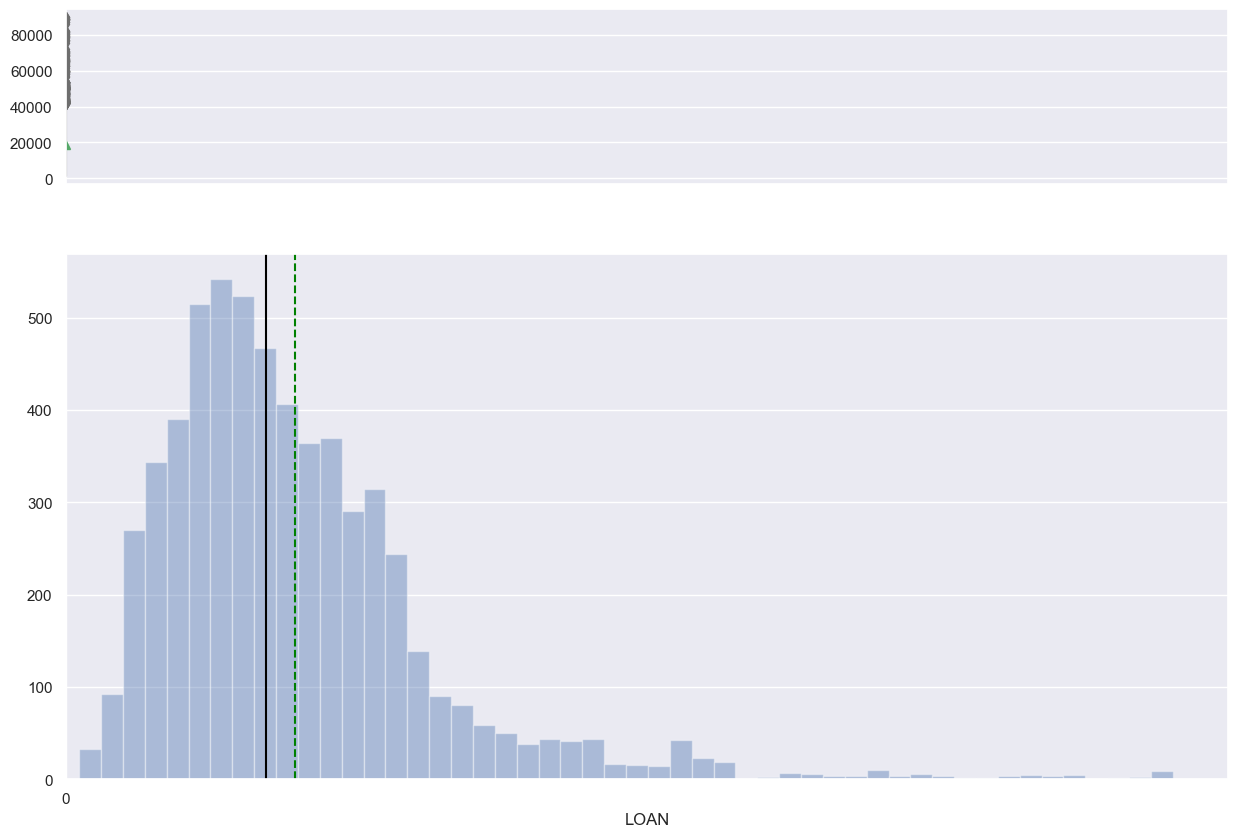

In [76]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

In [77]:
print('Min :',data['LOAN'].min())
print('Median :',data['LOAN'].median())
print('MAx :',data['LOAN'].max())

Min : 1100
Median : 16300.0
MAx : 89900


In [78]:
print('Min :',data['VALUE'].min())
print('Median :',data['VALUE'].median())
print('MAx :',data['VALUE'].max())

Min : 8000.0
Median : 89235.5
MAx : 855909.0


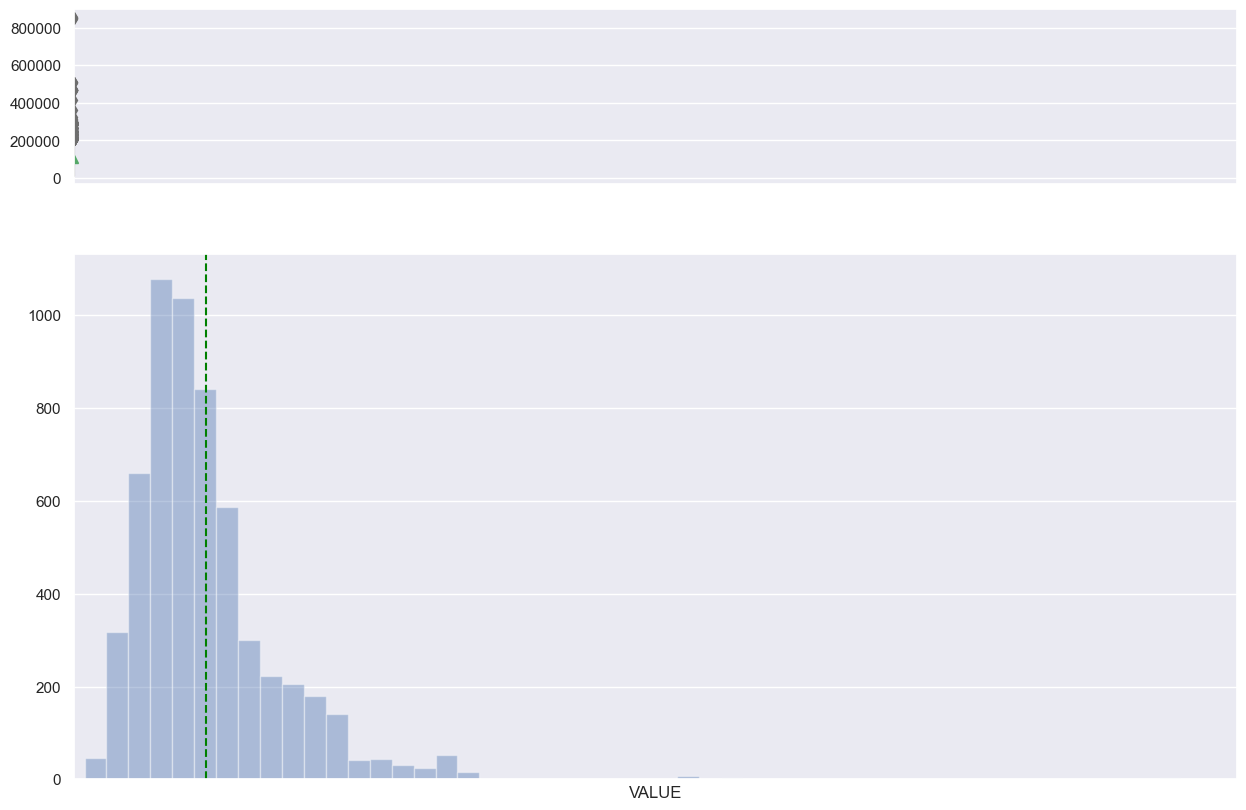

In [79]:
# Build the histogram boxplot for VALUE
histogram_boxplot(data['VALUE'])

**Insights __________**

In [80]:
print('Min :',data['MORTDUE'].min())
print('Median :',data['MORTDUE'].median())
print('MAx :',data['MORTDUE'].max())

Min : 2063.0
Median : 65019.0
MAx : 399550.0


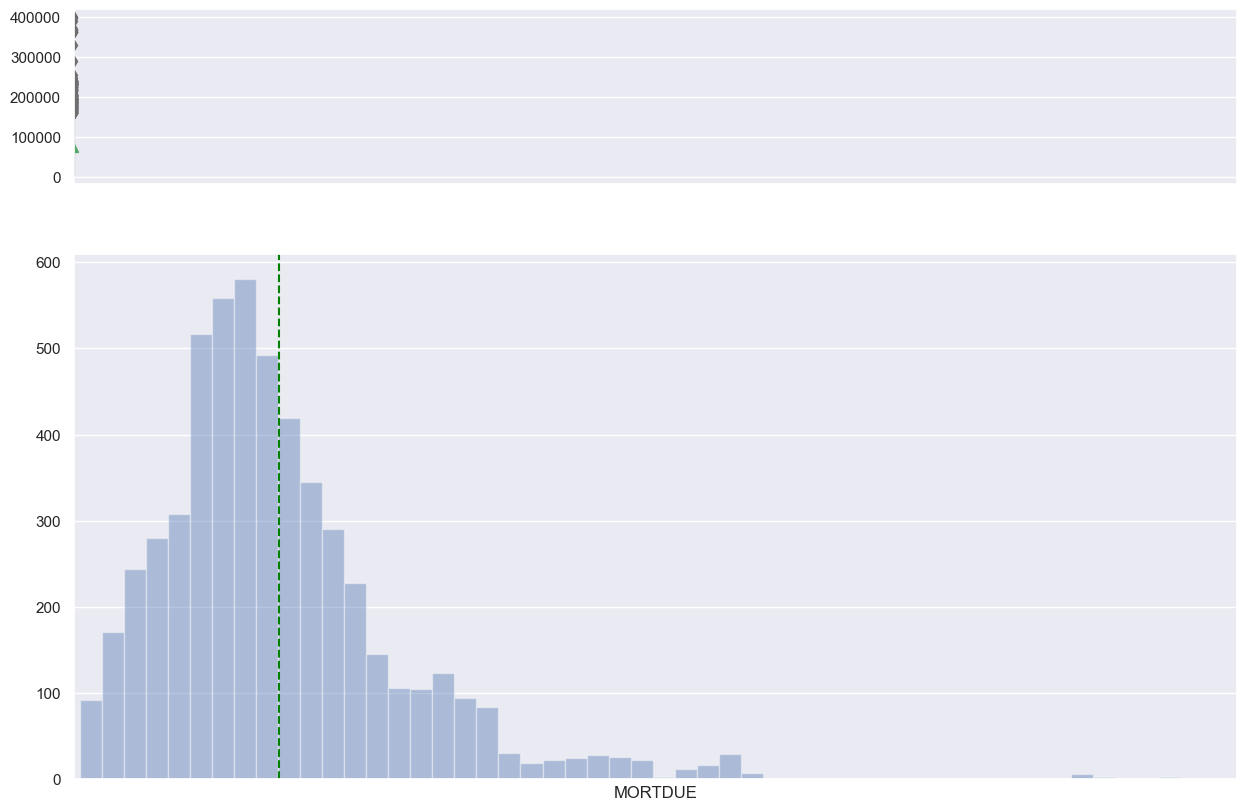

In [81]:
# Build the histogram boxplot for MORTDUE
histogram_boxplot(data['MORTDUE'])

In [82]:
print('Min :',data['DEROG'].min())
print('Median :',data['DEROG'].median())
print('MAx :',data['DEROG'].max())

Min : 0.0
Median : 0.0
MAx : 10.0


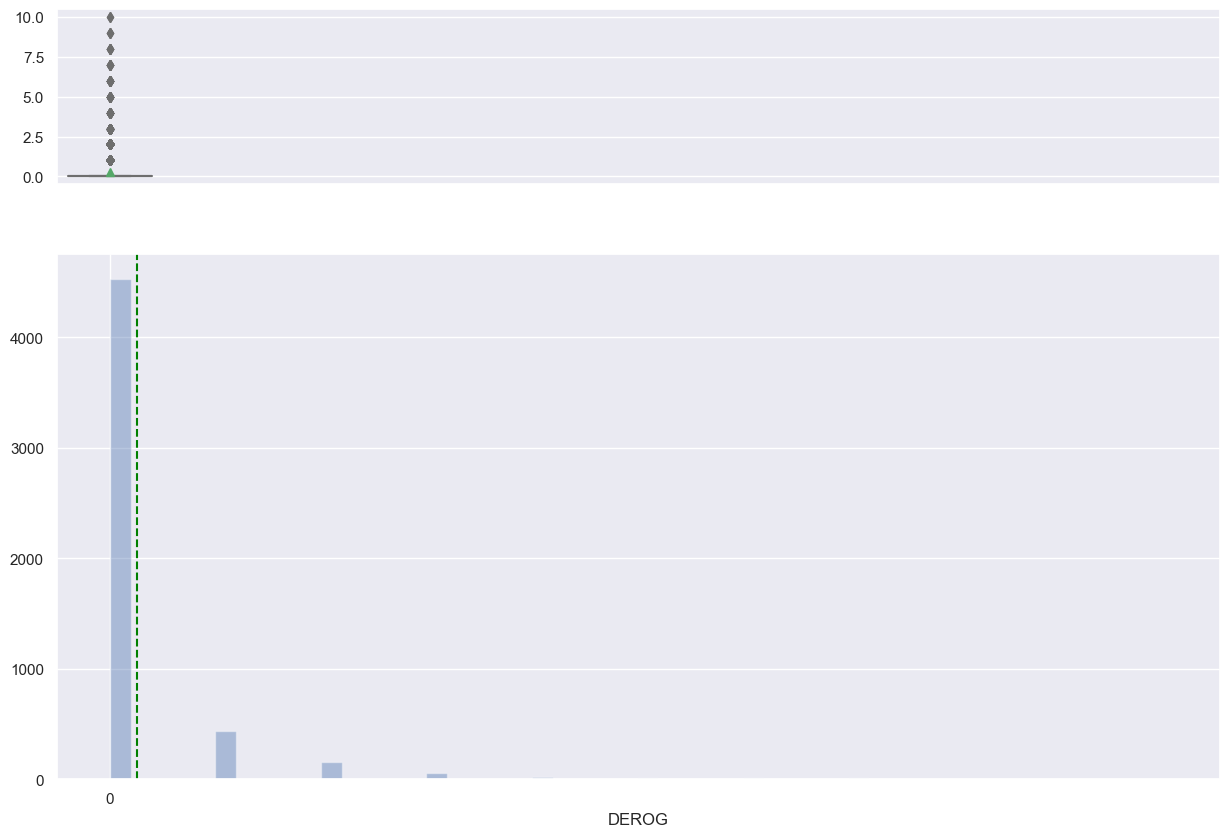

In [83]:
# Build the histogram boxplot for DEROG
histogram_boxplot(data['DEROG'])

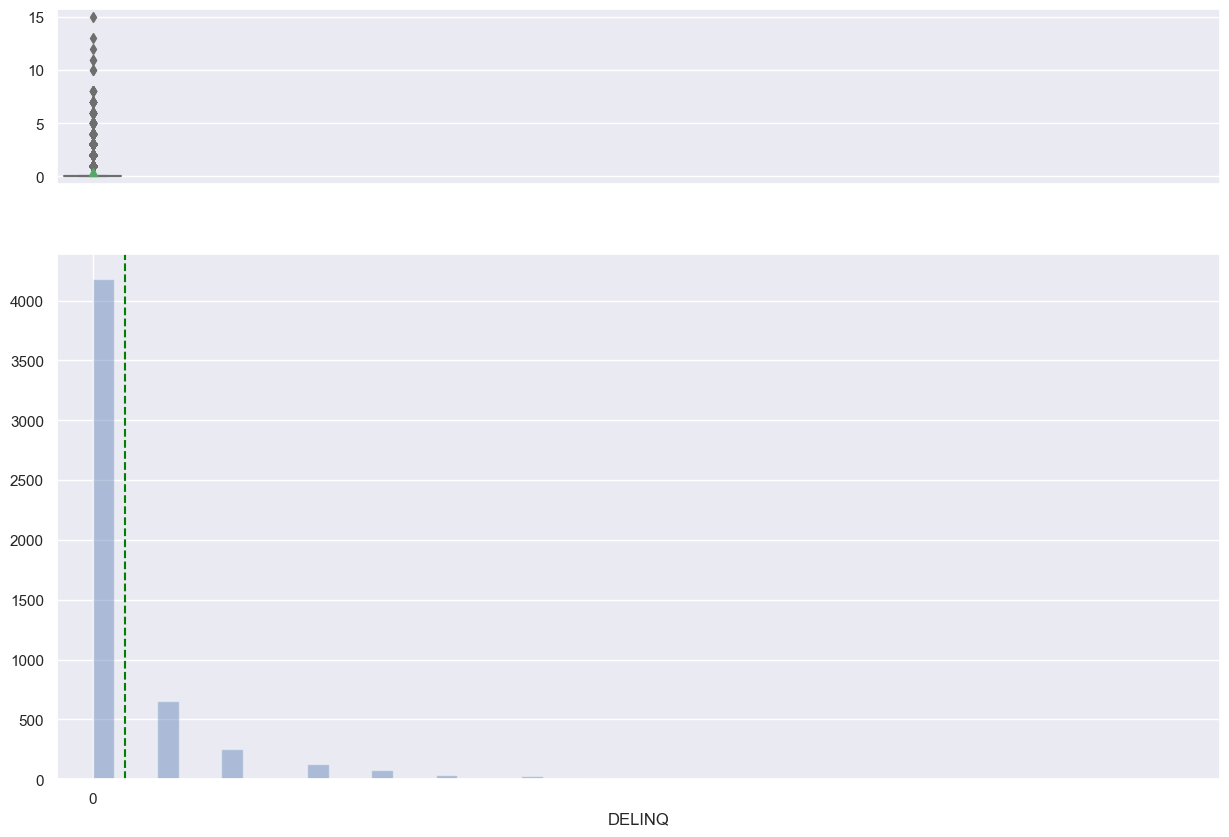

In [84]:
# Build the histogram boxplot for DELINQ
histogram_boxplot(data['DELINQ'])

In [85]:
print('Min :',data['CLAGE'].min())
print('Mean :',data['CLAGE'].mean())
print('Median :',data['CLAGE'].median())
print('MAx :',data['CLAGE'].max())

Min : 0.0
Mean : 179.76627518656605
Median : 173.46666667
MAx : 1168.2335609


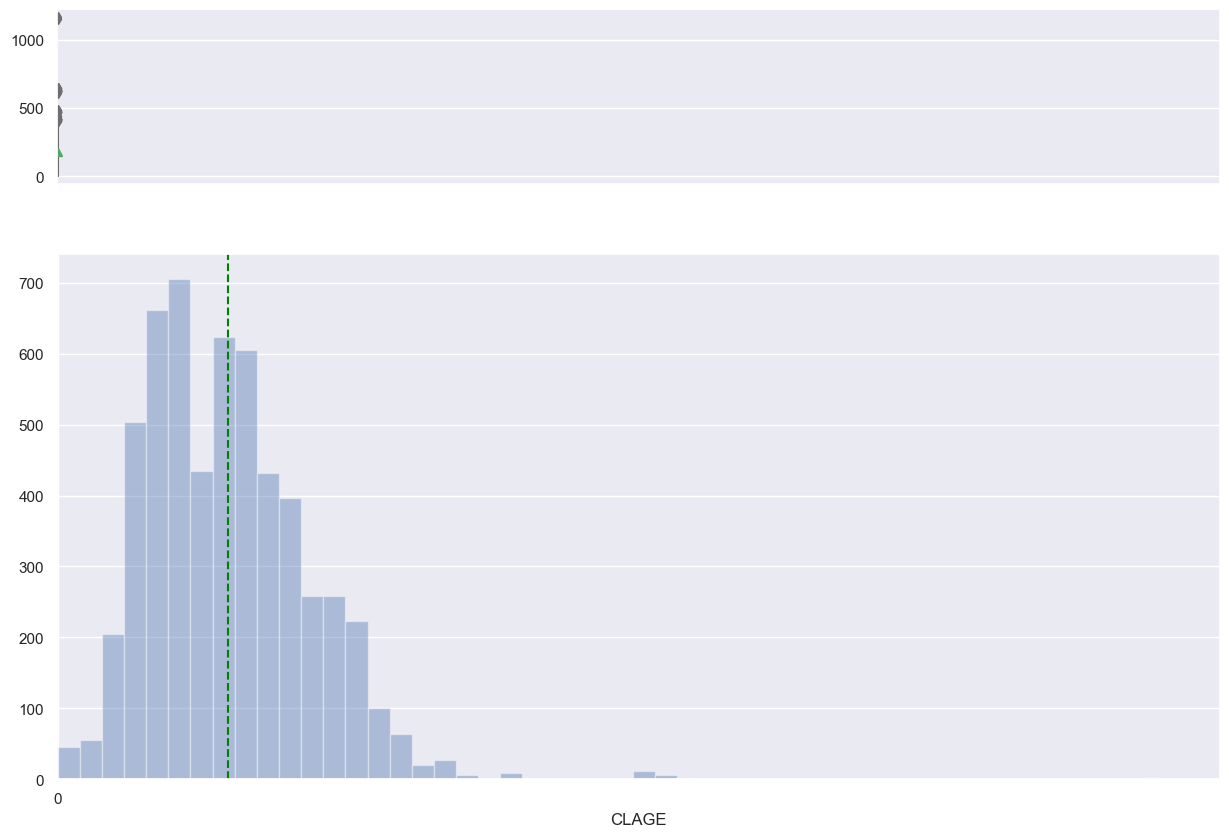

In [86]:
# Build the histogram boxplot for CLAGE
histogram_boxplot(data['CLAGE'])

In [87]:
print('Min :',data['DEBTINC'].min())
print('Mean :',data['DEBTINC'].mean())
print('Median :',data['DEBTINC'].median())
print('MAx :',data['DEBTINC'].max())

Min : 0.5244992154
Mean : 33.779915348721126
Median : 34.818261819
MAx : 203.31214869


<Axes: >

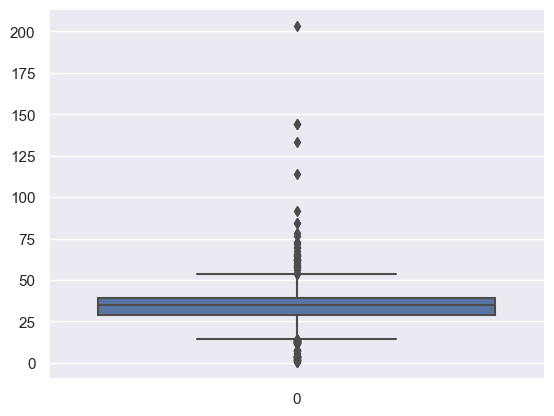

In [88]:
sns.boxplot(data['DEBTINC'])

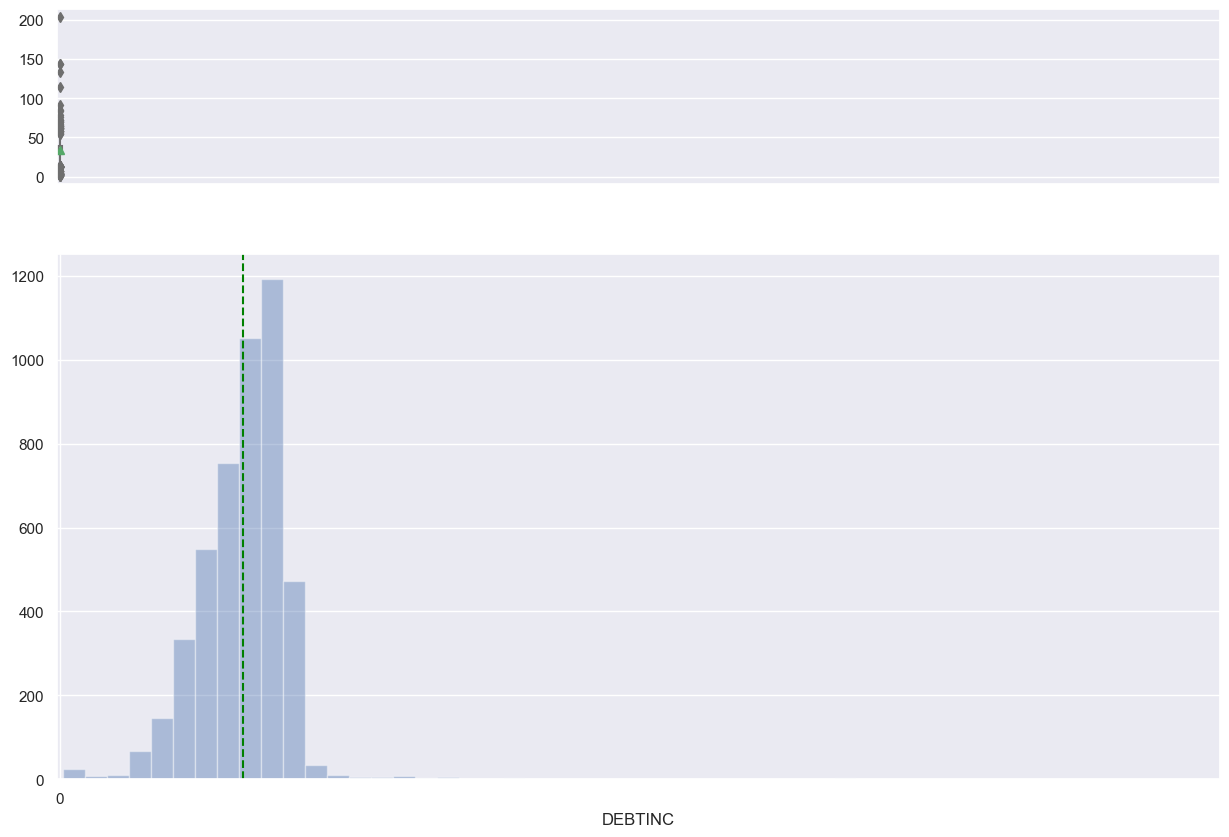

In [89]:
# Build the histogram boxplot for DEBTINC
histogram_boxplot(data['DEBTINC'])

In [90]:
data['JOB'].fillna('Other', inplace=True)

In [91]:
data.describe(include=['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5960,6,Other,2667


#### **Note:** As done above, analyze Histogram and Boxplot for other variables

**Insights ____________**

### **2. Univariate Analysis - Categorical Data**

In [92]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

#### Analyze Barplot for DELINQ

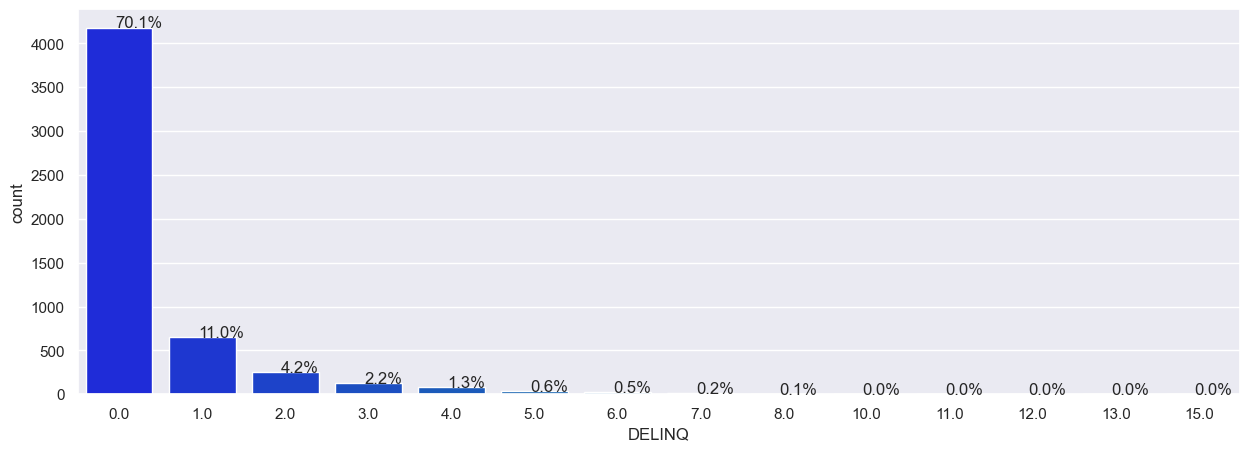

In [93]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

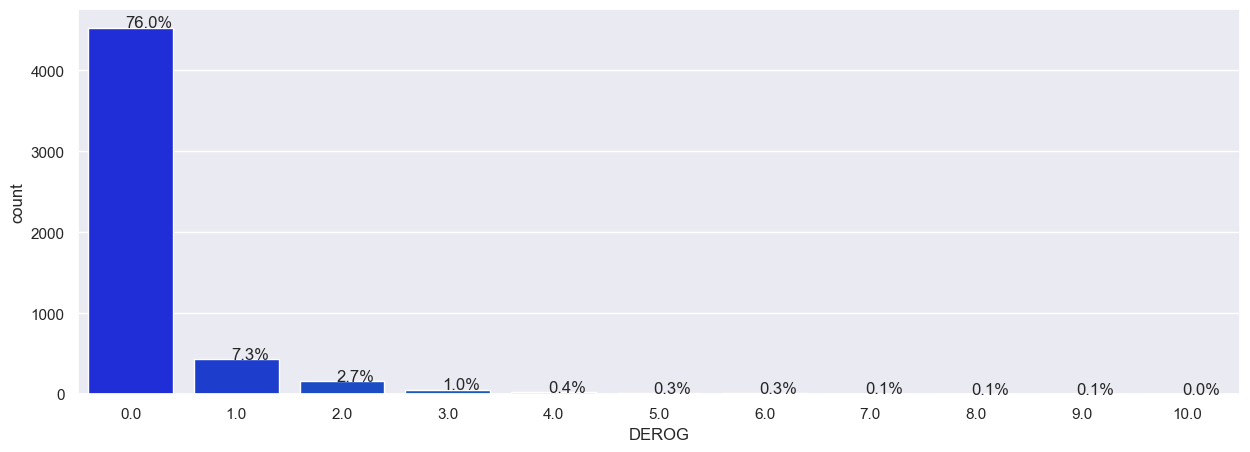

In [94]:
#Build barplot for DEROG

plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["DEROG"],palette='winter')
perc_on_bar(ax,data["DEROG"])

**Insights ________**

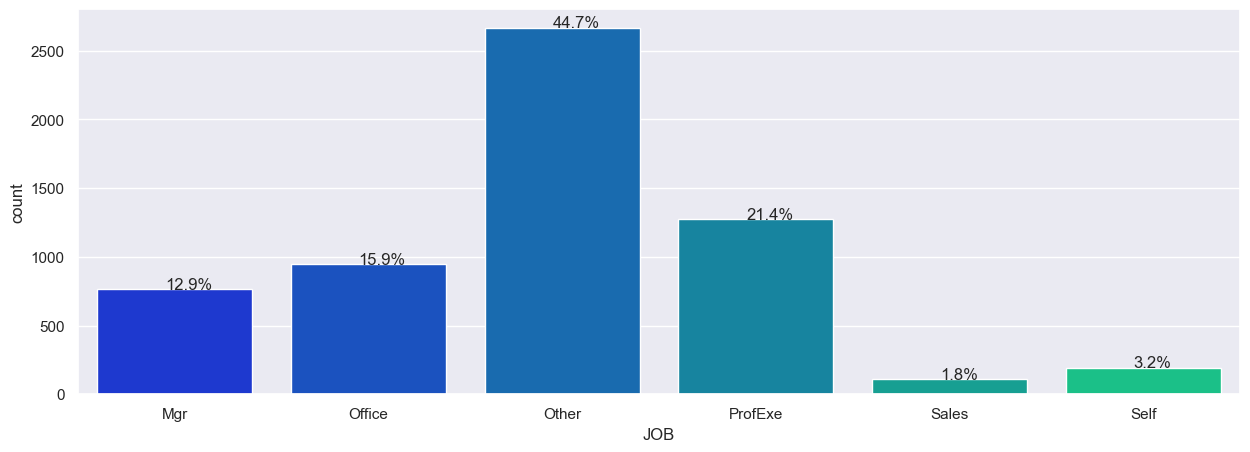

In [95]:
#Build barplot for DEROG

plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["JOB"],palette='winter')
perc_on_bar(ax,data["JOB"])

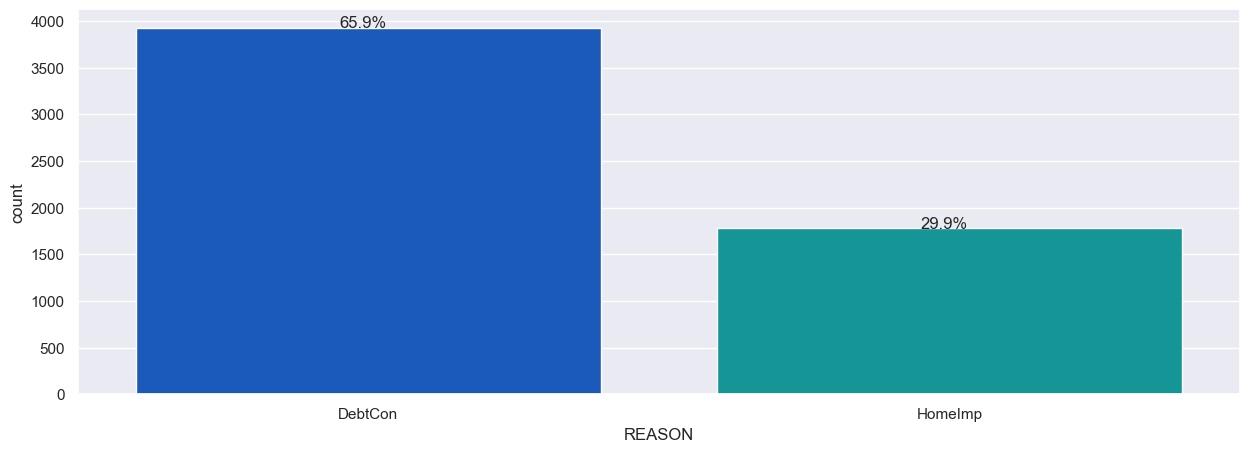

In [96]:
#Build barplot for DEROG

plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["REASON"],palette='winter')
perc_on_bar(ax,data["REASON"])

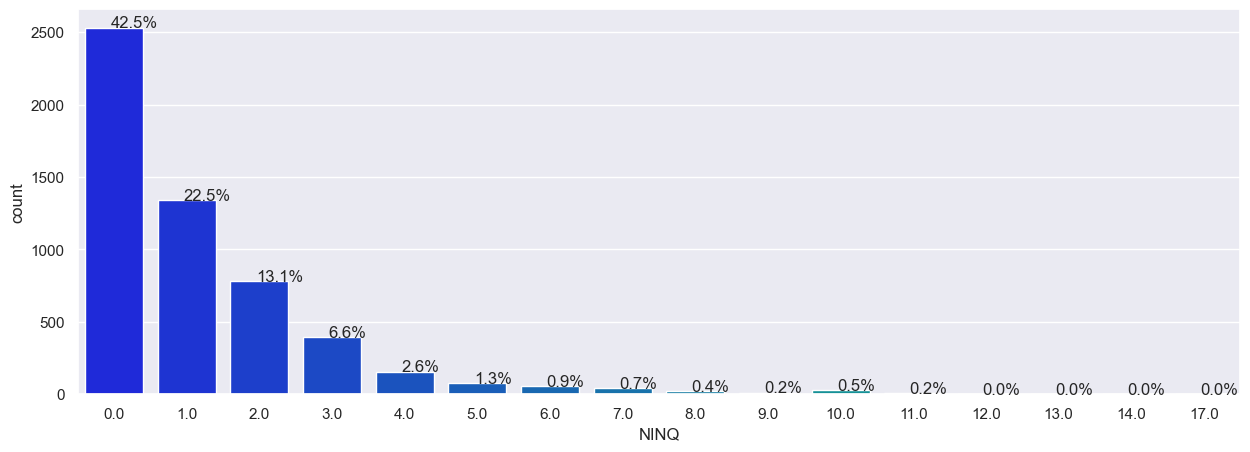

In [97]:
#Build barplot for DEROG

plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["NINQ"],palette='winter')
perc_on_bar(ax,data["NINQ"])

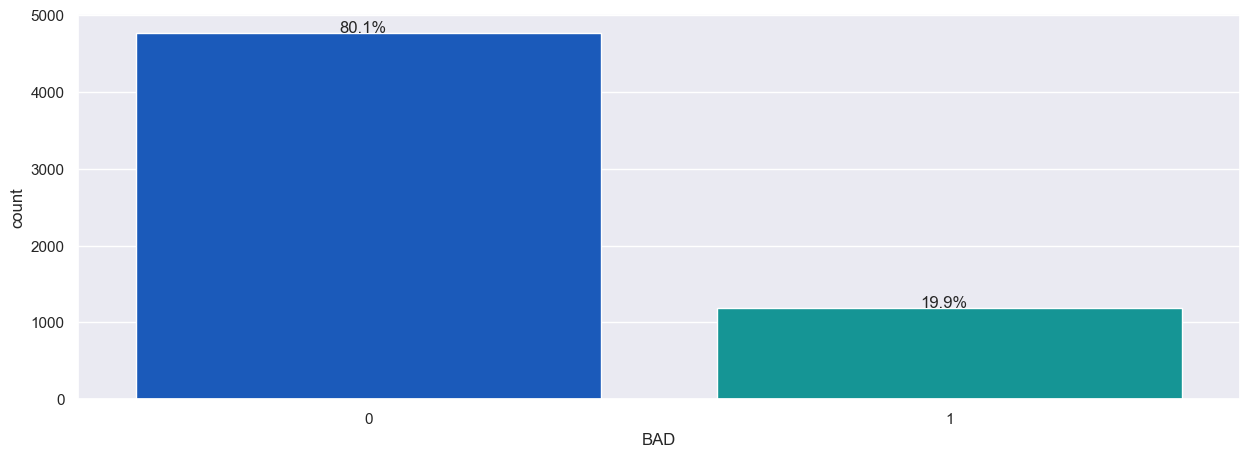

In [98]:
#Build barplot for DEROG

plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["BAD"],palette='winter')
perc_on_bar(ax,data["BAD"])

#### **Note:** As done above, analyze Histogram and Boxplot for other variables.

**Insights _____________**

## **Bivariate Analysis**

### **Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

<Axes: xlabel='BAD', ylabel='LOAN'>

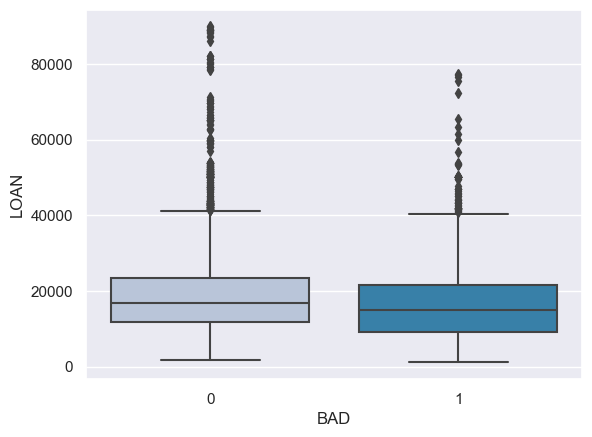

In [102]:
sns.boxplot(x=data["BAD"],y=data['LOAN'],palette="PuBu")

<Axes: xlabel='BAD', ylabel='DEROG'>

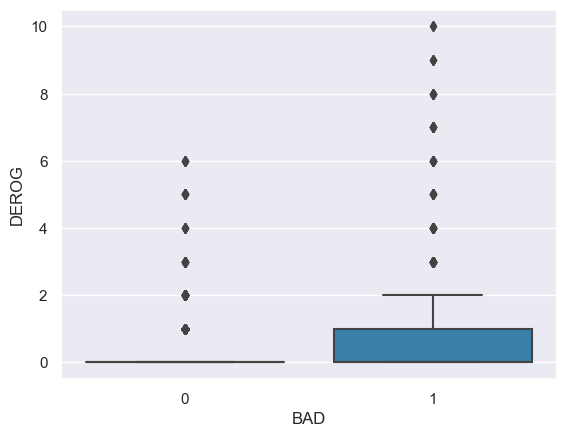

In [103]:
sns.boxplot(x=data["BAD"],y=data['DEROG'],palette="PuBu")

<Axes: xlabel='BAD', ylabel='CLAGE'>

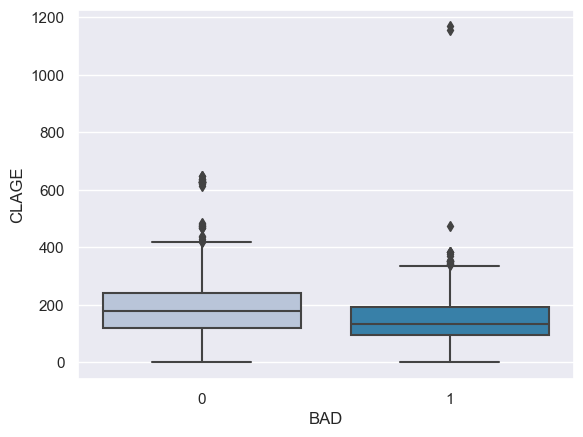

In [104]:
sns.boxplot(x=data["BAD"],y=data['CLAGE'],palette="PuBu")

<Axes: xlabel='BAD', ylabel='DELINQ'>

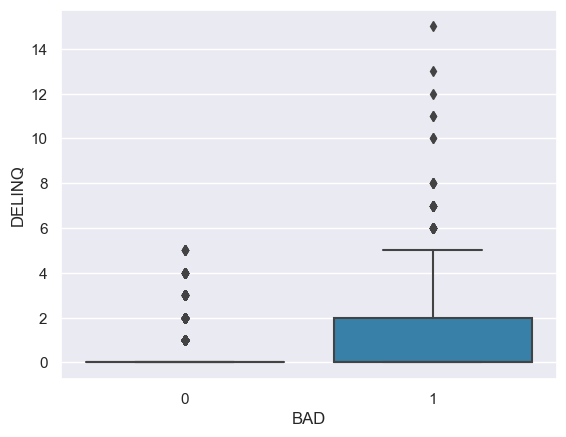

In [105]:
sns.boxplot(x=data["BAD"],y=data['DELINQ'],palette="PuBu")

<Axes: xlabel='BAD', ylabel='DEBTINC'>

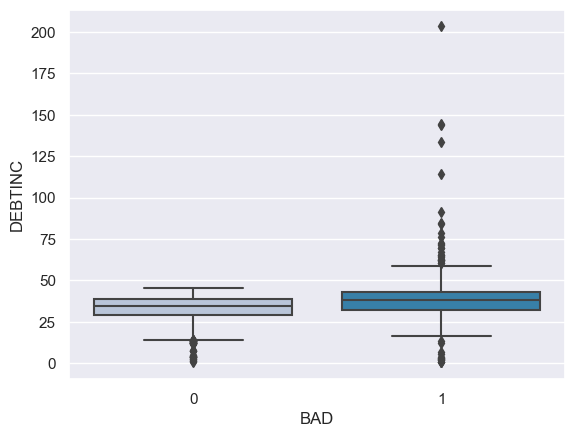

In [106]:
sns.boxplot(x=data["BAD"],y=data['DEBTINC'],palette="PuBu")

<Axes: xlabel='BAD', ylabel='VALUE'>

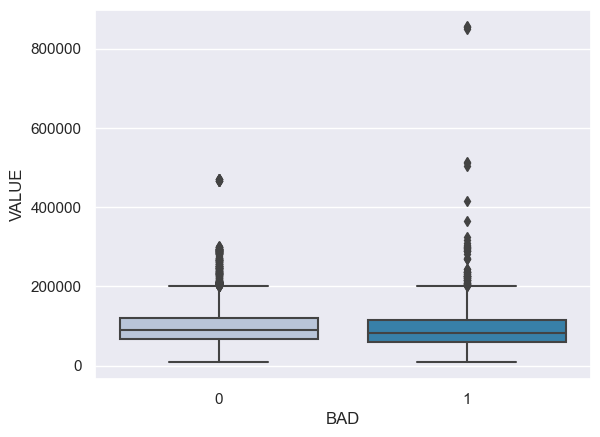

In [107]:
sns.boxplot(x=data["BAD"],y=data['VALUE'],palette="PuBu")

<Axes: xlabel='REASON', ylabel='LOAN'>

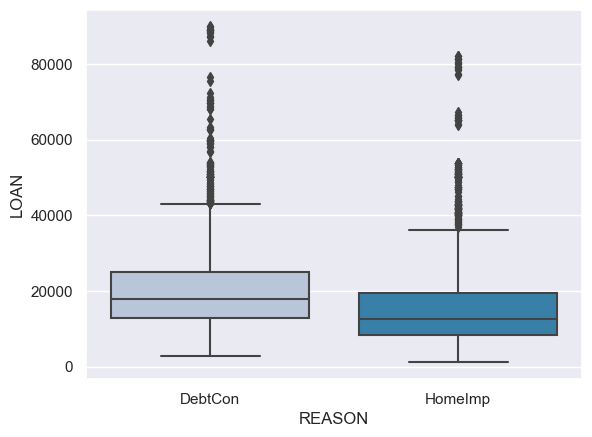

In [108]:
sns.boxplot(x=data["REASON"],y=data['LOAN'],palette="PuBu")

**Insights ______**

#### **Note:** As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables

### **Bivariate Analysis: Two Continuous Variables**

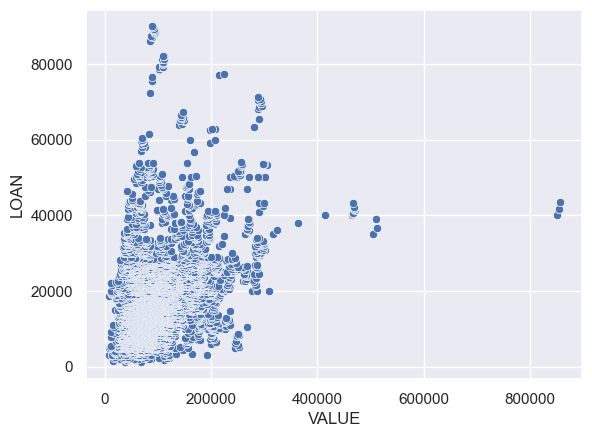

In [109]:
#sns.scatterplot(data["VALUE"],data['LOAN'],palette="PuBu")
sns.scatterplot(x = data["VALUE"], y = data['LOAN'] ,palette="PuBu");




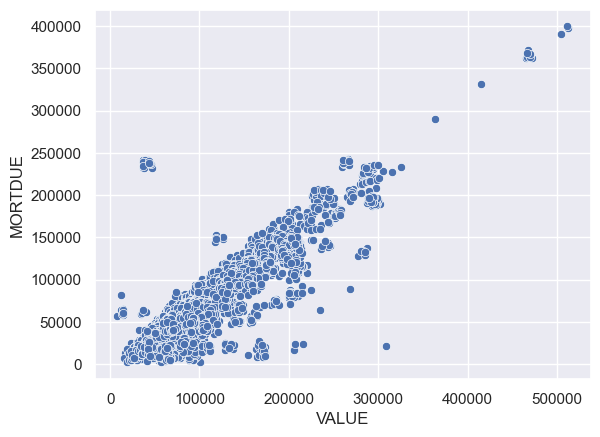

In [110]:
sns.scatterplot(x = data["VALUE"], y = data['MORTDUE'] ,palette="PuBu");

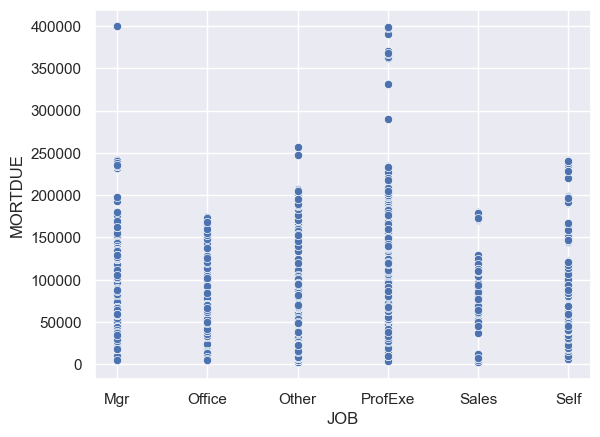

In [111]:
sns.scatterplot(x = data["JOB"], y = data['MORTDUE'] ,palette="PuBu");

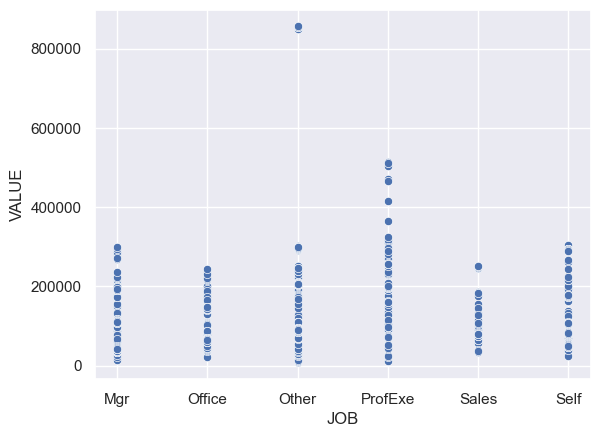

In [112]:
sns.scatterplot(x = data["JOB"], y = data['VALUE'] ,palette="PuBu");

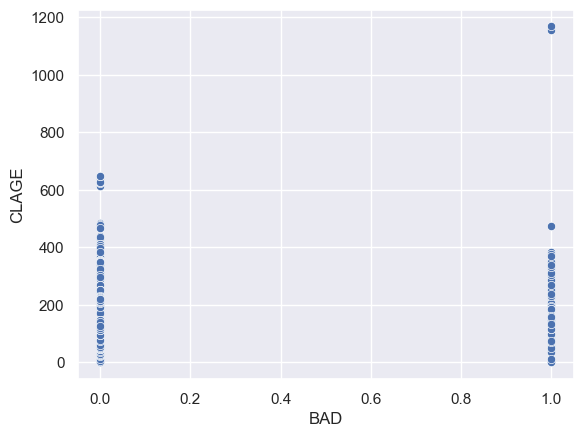

In [115]:
sns.scatterplot(x = data["BAD"], y = data['CLAGE'] ,palette="PuBu");

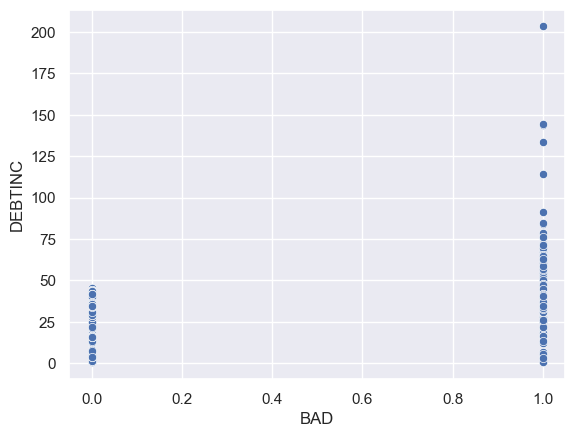

In [116]:
sns.scatterplot(x = data["BAD"], y = data['DEBTINC'] ,palette="PuBu");

In [117]:
new_df = data[['MORTDUE', 'VALUE']].copy()
modelForMissingValue = LinearRegression()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MORTDUE  5442 non-null   float64
 1   VALUE    5848 non-null   float64
dtypes: float64(2)
memory usage: 93.2 KB


In [118]:
df_cleaned = new_df.dropna()
df_cleaned.info()
from sklearn.linear_model import LinearRegression
modelForMissingValue=LinearRegression()
modelForMissingValue.fit(df_cleaned[['MORTDUE']].dropna(), df_cleaned['VALUE'].dropna())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5357 entries, 0 to 5959
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MORTDUE  5357 non-null   float64
 1   VALUE    5357 non-null   float64
dtypes: float64(2)
memory usage: 125.6 KB


LinearRegression()

In [119]:


dataMissingFix = data.copy()

# Predict and fill missing values in feature 'A' based on 'B'
#dataMissingFix.loc[dataMissingFix['VALUE'].isnull(), 'VALUE'] = modelForMissingValue.predict(dataMissingFix[['MORTDUE']])[dataMissingFix['VALUE'].isnull()]
#print(modelForMissingValue.predict(350000))



**Insights: _____**

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of continuous variables

**Insights ____________**

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [120]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


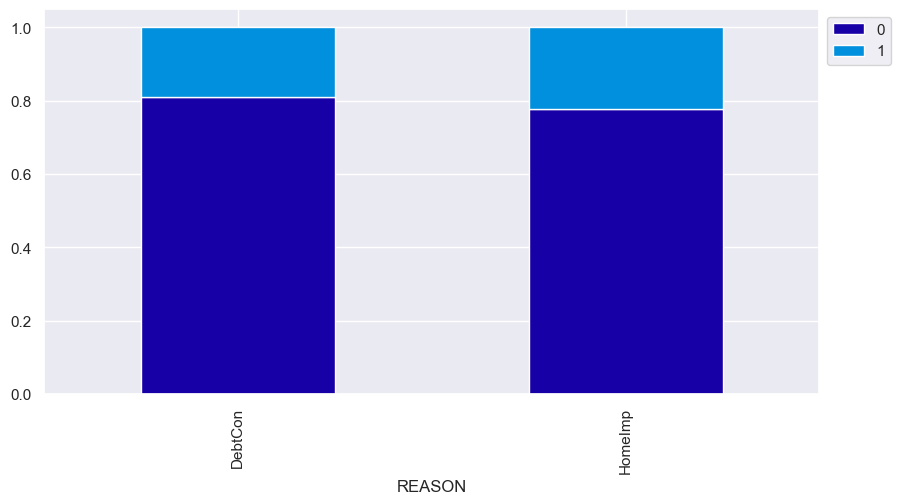

In [121]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    2090   577  2667
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4771  1189  5960
------------------------------------------------------------------------------------------------------------------------


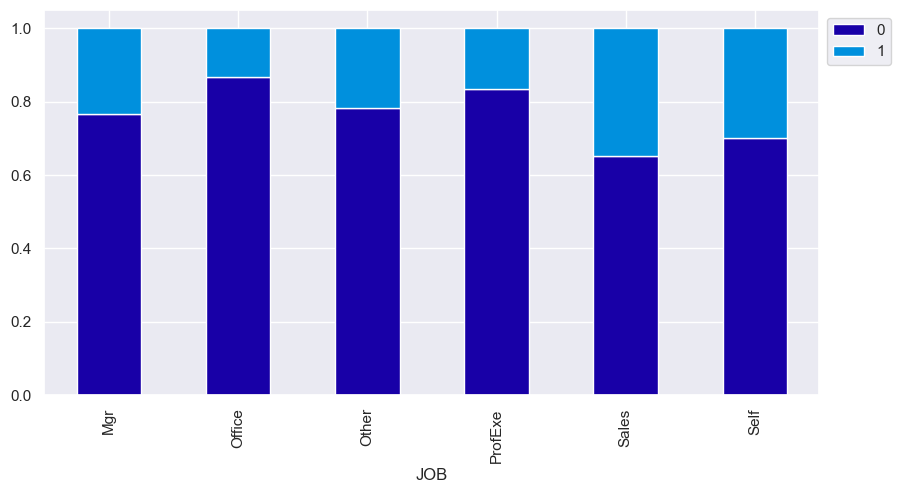

In [122]:
stacked_plot(data['JOB'])

BAD       0     1   All
DEROG                  
0.0    3773   754  4527
1.0     266   169   435
2.0      78    82   160
3.0      15    43    58
4.0       5    18    23
5.0       8     7    15
6.0       5    10    15
7.0       0     8     8
8.0       0     6     6
9.0       0     3     3
10.0      0     2     2
All    4150  1102  5252
------------------------------------------------------------------------------------------------------------------------


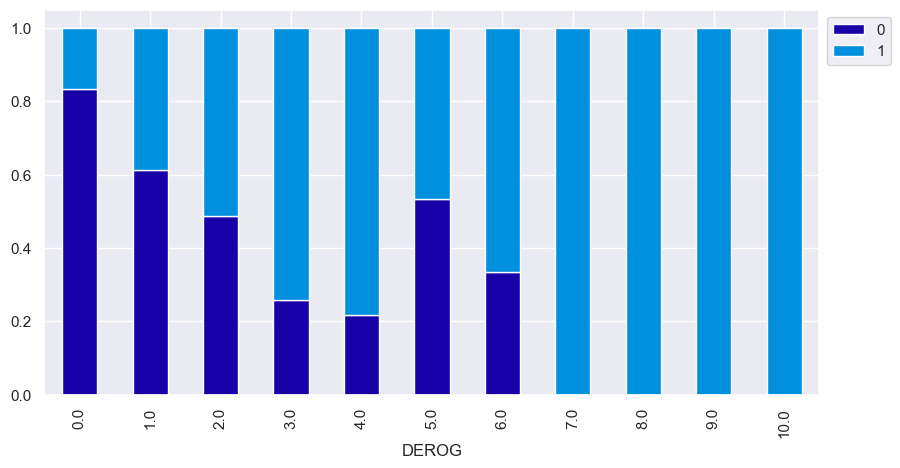

In [123]:
stacked_plot(data['DEROG'])

BAD              0     1   All
CLAGE                         
0.0              0     2     2
0.4867114508     1     0     1
0.5071145295     1     0     1
2.0333333333     0     1     1
2.8207855775     1     0     1
...            ...   ...   ...
648.32849259     1     0     1
649.74710438     1     0     1
1154.6333333     0     1     1
1168.2335609     0     1     1
All           4541  1111  5652

[5315 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


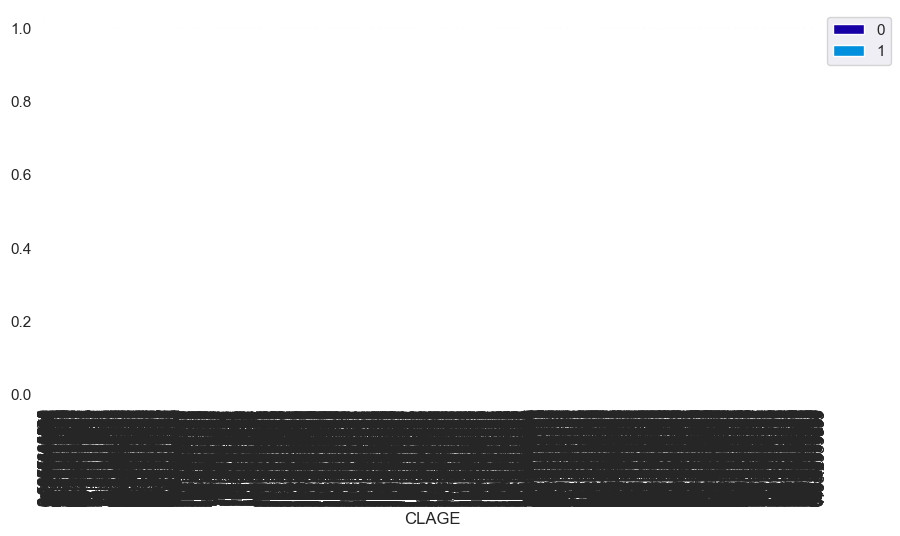

In [124]:
stacked_plot(data['CLAGE'])

BAD        0     1   All
DELINQ                  
0.0     3596   583  4179
1.0      432   222   654
2.0      138   112   250
3.0       58    71   129
4.0       32    46    78
5.0        7    31    38
6.0        0    27    27
7.0        0    13    13
8.0        0     5     5
10.0       0     2     2
11.0       0     2     2
12.0       0     1     1
13.0       0     1     1
15.0       0     1     1
All     4263  1117  5380
------------------------------------------------------------------------------------------------------------------------


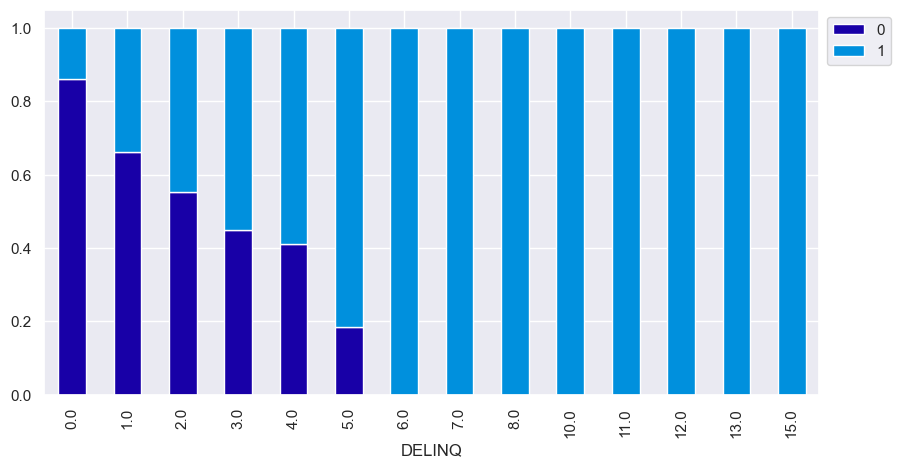

In [125]:
stacked_plot(data['DELINQ'])

BAD      0     1   All
YOJ                   
0.0    357    58   415
0.1      3    11    14
0.2      5     5    10
0.25     0     1     1
0.3      3     4     7
...    ...   ...   ...
34.0     1     1     2
35.0     5     0     5
36.0     5     0     5
41.0     0     3     3
All   4321  1124  5445

[100 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


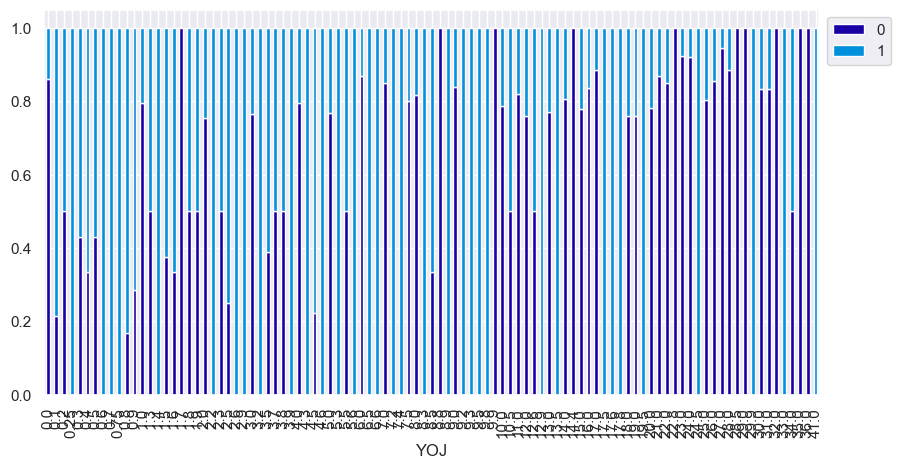

In [304]:
stacked_plot(data['YOJ'])

BAD      0     1   All
CLNO                  
0.0     37    25    62
1.0      1     5     6
2.0      0    15    15
3.0     21    13    34
4.0     31    11    42
...    ...   ...   ...
63.0     0     1     1
64.0     0     5     5
65.0     0     3     3
71.0     0     2     2
All   4602  1136  5738

[63 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


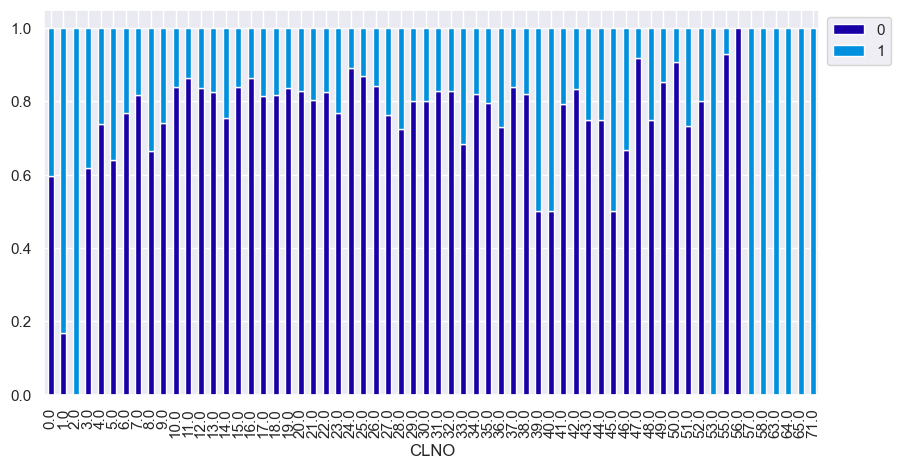

In [305]:
stacked_plot(data['CLNO'])

BAD              0    1   All
DEBTINC                      
0.5244992154     0    1     1
0.7202950067     1    0     1
0.8381175254     0    1     1
1.0289309682     0    1     1
1.5659310471     1    0     1
...            ...  ...   ...
133.52827043     0    1     1
143.94960495     0    1     1
144.18900129     0    1     1
203.31214869     0    1     1
All           4290  403  4693

[4694 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


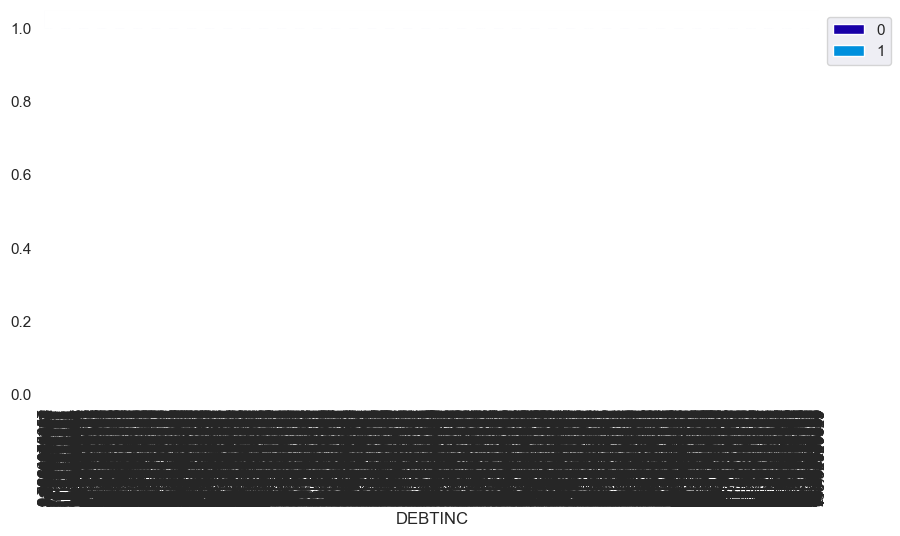

In [126]:
stacked_plot(data['DEBTINC'])

**Insights ____________**

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of Categorical vs BAD

**Insights ___________________**

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

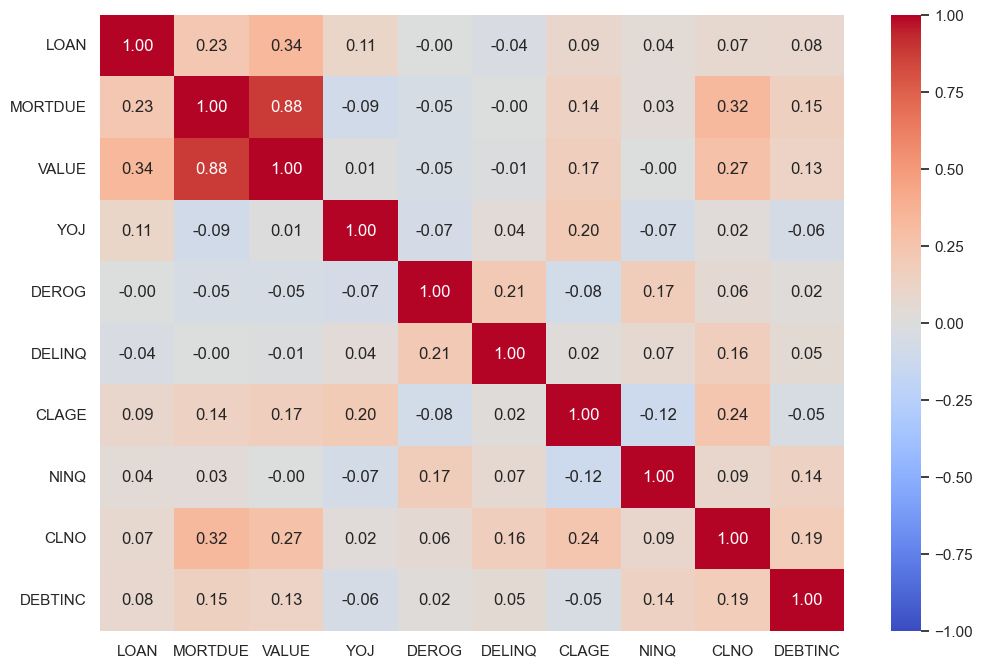

In [127]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns
# Remove ___________ and complete the code

#corr = data[___________]._________________
corr = data[numerical_col].corr()

# plot the heatmap
# Remove ___________ and complete the code

plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

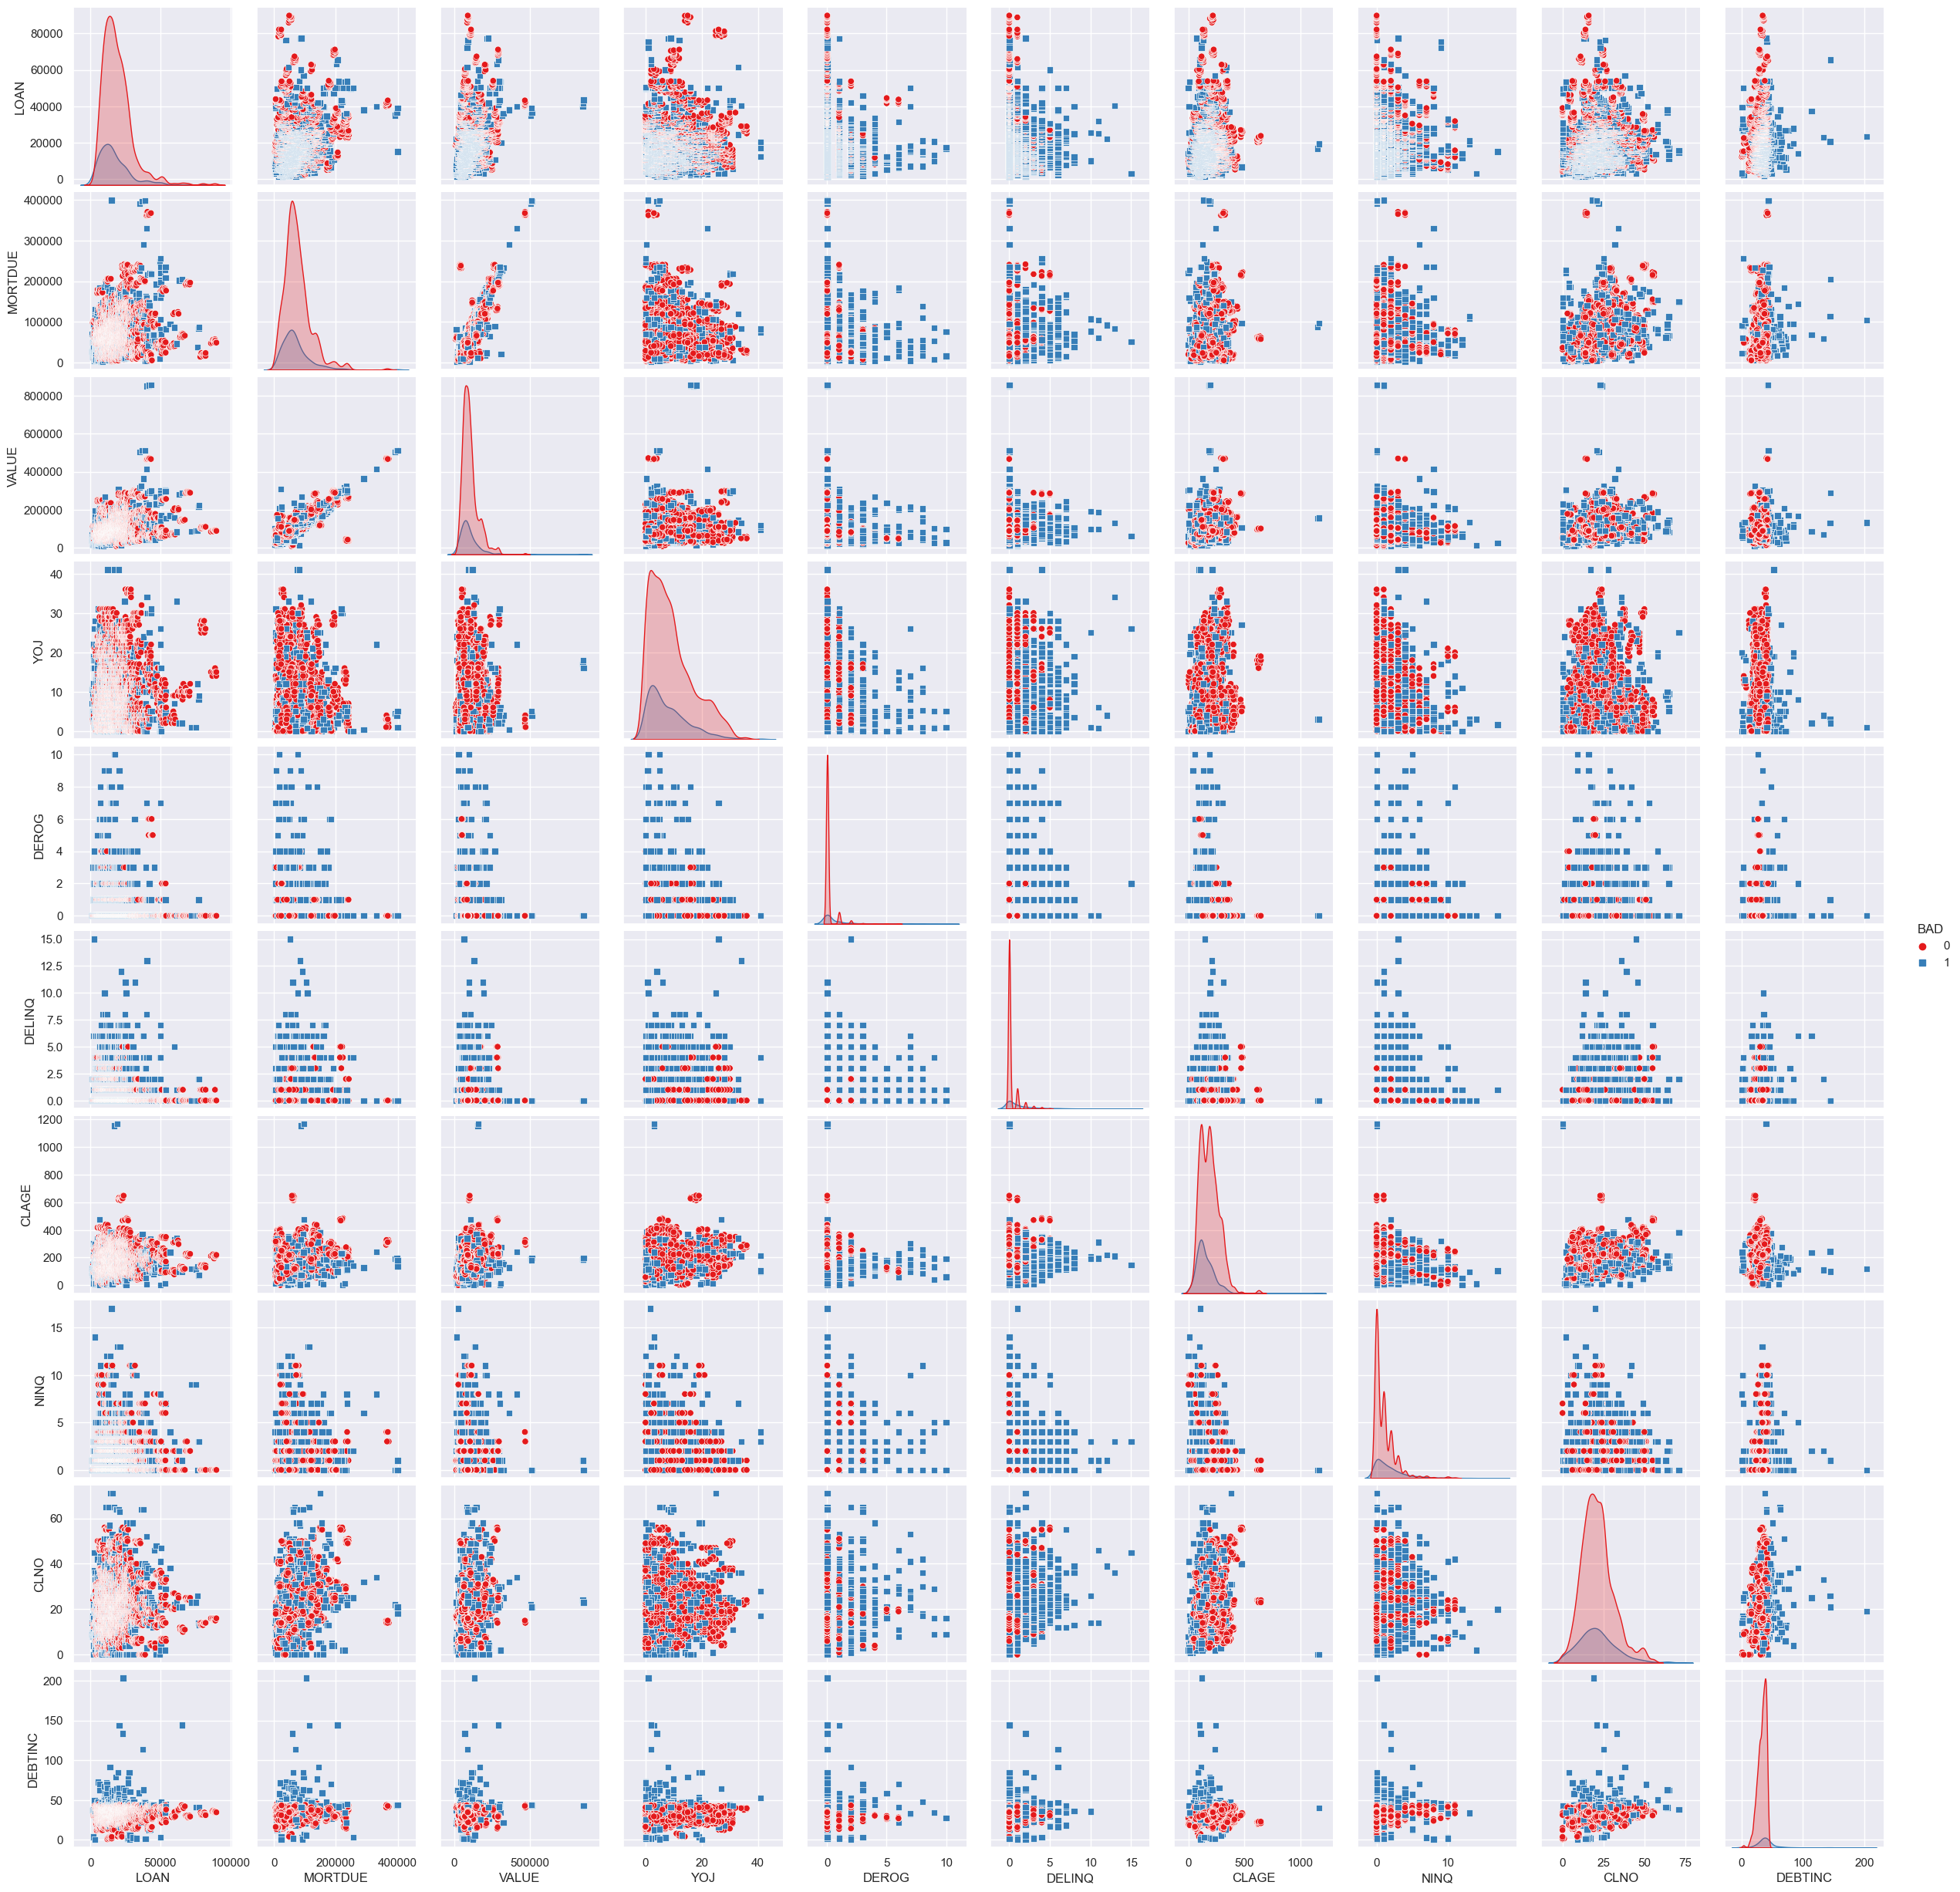

In [128]:
# Build pairplot for the data with hue = 'BAD'
# Remove ___________ and complete the code

#sns.pairplot(data)

sns.pairplot(data, hue='BAD', palette='Set1', markers=["o", "s", "D"])

# Show the pairplot
plt.show()

### **Think about it**
- Are there missing values and outliers in the dataset? If yes, how can you treat them? 
- Can you think of different ways in which this can be done and when to treat these outliers or not?
- Can we create new features based on Missing values?

#### Treating Outliers

In [129]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1=np.percentile(data[col], 25)  # 25th quantile
    Q3=np.percentile(data[col], 75)  # 75th quantile
    IQR=Q3-Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5 * IQR  #define lower whisker
    Upper_Whisker = Q3 + 1.5 * IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) 
    # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
    # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [130]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

#### Adding new columns in the dataset for each column which has missing values 

In [131]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [132]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)
    

#### Filling missing values in numerical columns with median and mode in categorical variables

In [133]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
# Remove _________ and complete the code
df[num_data.columns] = num_data.fillna(df[num_data.columns].median())

# Fill object columns with model.
# Remove _________ and complete the code
for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)

In [134]:
# Calculate the percentage of missing values in each column
missing_percentage_df = (df.isna().sum() / len(df)) * 100

# Display the result
print(missing_percentage_df)

BAD                            0.0
LOAN                           0.0
MORTDUE                        0.0
VALUE                          0.0
REASON                         0.0
JOB                            0.0
YOJ                            0.0
DEROG                          0.0
DELINQ                         0.0
CLAGE                          0.0
NINQ                           0.0
CLNO                           0.0
DEBTINC                        0.0
MORTDUE_missing_values_flag    0.0
VALUE_missing_values_flag      0.0
REASON_missing_values_flag     0.0
YOJ_missing_values_flag        0.0
DEROG_missing_values_flag      0.0
DELINQ_missing_values_flag     0.0
CLAGE_missing_values_flag      0.0
NINQ_missing_values_flag       0.0
CLNO_missing_values_flag       0.0
DEBTINC_missing_values_flag    0.0
dtype: float64


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   BAD                          5960 non-null   category
 1   LOAN                         5960 non-null   int64   
 2   MORTDUE                      5960 non-null   float64 
 3   VALUE                        5960 non-null   float64 
 4   REASON                       5960 non-null   category
 5   JOB                          5960 non-null   category
 6   YOJ                          5960 non-null   float64 
 7   DEROG                        5960 non-null   float64 
 8   DELINQ                       5960 non-null   float64 
 9   CLAGE                        5960 non-null   float64 
 10  NINQ                         5960 non-null   float64 
 11  CLNO                         5960 non-null   float64 
 12  DEBTINC                      5960 non-null   float64 
 13  MOR

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **Data Preparation**

### **Separating the target variable from other variables**

In [136]:
#@title
# Drop the dependent variable 'BAD' from the dataframe and create the X(independent variable) matrix
# Remove _________ and complete the code
X = df.drop('BAD', axis=1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
# Remove _________ and complete the code
X = pd.get_dummies(X, columns=['REASON','JOB'])

# Create y(dependent varibale)
# Remove _________ and complete the code

y = df['BAD']

In [137]:
X

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,...,CLNO_missing_values_flag,DEBTINC_missing_values_flag,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,...,False,True,0,1,0,0,1,0,0,0
1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262,...,False,True,0,1,0,0,1,0,0,0
2,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,...,False,True,0,1,0,0,1,0,0,0
3,1500,65019.0,89235.5,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262,...,True,True,1,0,0,0,1,0,0,0
4,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,...,False,True,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,41600,57264.0,90185.0,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,...,False,False,1,0,0,0,1,0,0,0
5956,41600,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,...,False,False,1,0,0,0,1,0,0,0
5957,41600,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,...,False,False,1,0,0,0,1,0,0,0
5958,41600,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,...,False,False,1,0,0,0,1,0,0,0


### **Splitting the data into 70% train and 30% test set**

In [138]:
#@title
# Split the data into training and test set
# Remove _________ and complete the code


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y);

# Checking the shape of the Train and Test sets
print('X Train Shape:', X_train.shape);
print('X Test Shape:', X_test.shape);
print('Y Train Shape:', y_train.shape);
print('Y Test Shape:', y_test.shape);

X Train Shape: (4172, 28)
X Test Shape: (1788, 28)
Y Train Shape: (4172,)
Y Test Shape: (1788,)


### **Think about it** 
- You can try different splits like 70:30 or 80:20 as per your choice. Does this change in split affect the performance?
- If the data is imbalanced, can you make the split more balanced and if yes, how?

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

In [139]:
#@title
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model** 

In [140]:
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [141]:
#@title
# Defining the Logistic regression model
# Remove _________ and complete the code
#____________

# Fitting the model on the training data 
# Remove _________ and complete the code

#________________

#### Checking the performance on the train dataset

In [142]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict for the training set
y_train_pred = logistic_model.predict(X_train)

# Calculate performance metrics for the training set
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

# Print the performance metrics for the training set
print("Performance on the Training Set:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Performance on the Training Set:
Accuracy: 0.81
Precision: 0.74
Recall: 0.04
F1 Score: 0.07


In [143]:
#@title
#Predict for train set
# Remove _________ and complete the code
#________________

#checking the performance on the train dataset
# Remove _________ and complete the code
#_________________________

#### Checking the performance on the test dataset

In [144]:
# Checking the performance on the test dataset
# Predict for the test set
y_test_pred = logistic_model.predict(X_test)

# Calculate performance metrics for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nPerformance on the Test Set:")
print("Accuracy: {:.2f}".format(test_accuracy))
print("Precision: {:.2f}".format(test_precision))
print("Recall: {:.2f}".format(test_recall))
print("F1 Score: {:.2f}".format(test_f1))


Performance on the Test Set:
Accuracy: 0.81
Precision: 0.78
Recall: 0.05
F1 Score: 0.09


In [145]:
#@title
#Predict for test set
# Remove _________ and complete the code

#_______________________

#checking the performance on the test dataset
# Remove _________ and complete the code

#_____________________________

**Observations: __________**

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [147]:
# Get the coefficients of the Logistic Regression model
coefficients = logistic_model.coef_[0]

# Get the names of the features (column names) in the same order as the coefficients
feature_names = X_train.columns

# Create a DataFrame to display the coefficients and their corresponding feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients by absolute value to see the most influential features
coefficients_df['Absolute_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the coefficients and their importance
print("Coefficients and Importance for Loan Approval:")
print(coefficients_df)

Coefficients and Importance for Loan Approval:
                        Feature  Coefficient  Absolute_Coefficient
9                       DEBTINC     0.022098              0.022098
8                          CLNO     0.008885              0.008885
6                         CLAGE    -0.007581              0.007581
5                        DELINQ     0.007105              0.007105
7                          NINQ     0.004520              0.004520
4                         DEROG     0.004043              0.004043
19  DEBTINC_missing_values_flag     0.003958              0.003958
3                           YOJ    -0.001681              0.001681
11    VALUE_missing_values_flag     0.000591              0.000591
23                   JOB_Office    -0.000533              0.000533
14    DEROG_missing_values_flag    -0.000385              0.000385
15   DELINQ_missing_values_flag    -0.000293              0.000293
22                      JOB_Mgr     0.000240              0.000240
21             

In [148]:
#@title
# Printing the coefficients of logistic regression
# Remove _________ and complete the code


#_____________________

In [149]:
from sklearn.tree import DecisionTreeClassifier

# 4. Create and train a Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# 5. Evaluate the model's performance
y_pred = decision_tree_model.predict(X_test)

# Calculate performance metrics
dtest_accuracy = accuracy_score(y_test, y_pred)
dtest_precision = precision_score(y_test, y_pred)
dtest_recall = recall_score(y_test, y_pred)
dtest_f1 = f1_score(y_test, y_pred)



In [150]:
print("\nPerformance on the Test Set:")
print("Accuracy: {:.2f}".format(dtest_accuracy))
print("Precision: {:.2f}".format(dtest_precision))
print("Recall: {:.2f}".format(dtest_recall))
print("F1 Score: {:.2f}".format(dtest_f1))


Performance on the Test Set:
Accuracy: 0.86
Precision: 0.67
Recall: 0.64
F1 Score: 0.65


In [151]:
# 4. Create and train a Decision Tree Classifier
max_depth = 5
decision_tree_model_tuned = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
decision_tree_model_tuned.fit(X_train, y_train)

# 5. Evaluate the model's performance
y_pred = decision_tree_model_tuned.predict(X_test)

# Calculate performance metrics
dtest5_accuracy = accuracy_score(y_test, y_pred)
dtest5_precision = precision_score(y_test, y_pred)
dtest5_recall = recall_score(y_test, y_pred)
dtest5_f1 = f1_score(y_test, y_pred)

print("\nPerformance on the Test Set:")
print("Accuracy: {:.2f}".format(dtest5_accuracy))
print("Precision: {:.2f}".format(dtest5_precision))
print("Recall: {:.2f}".format(dtest5_recall))
print("F1 Score: {:.2f}".format(dtest5_f1))



Performance on the Test Set:
Accuracy: 0.89
Precision: 0.73
Recall: 0.67
F1 Score: 0.70


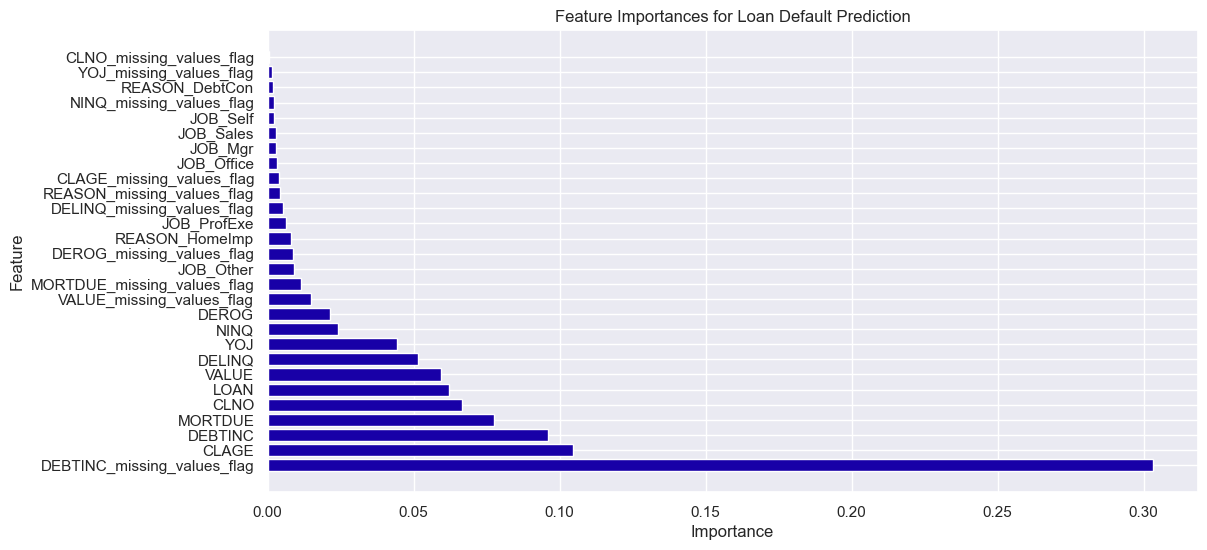

In [152]:
# Get feature importances
feature_importances = decision_tree_model.feature_importances_

# Create a DataFrame to display feature importances
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Loan Default Prediction')
plt.show()

**Insights ________**

In [167]:
# 4. Create and train a Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# 5. Evaluate the model's performance
y_pred = random_forest_model.predict(X_test)

# Calculate performance metrics
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Random Forest Model Performance:")
print("Accuracy: {:.2f}".format(rf_accuracy))
print("Precision: {:.2f}".format(rf_precision))
print("Recall: {:.2f}".format(rf_recall))
print("F1 Score: {:.2f}".format(rf_f1))






Random Forest Model Performance:
Accuracy: 0.90
Precision: 0.86
Recall: 0.68
F1 Score: 0.76


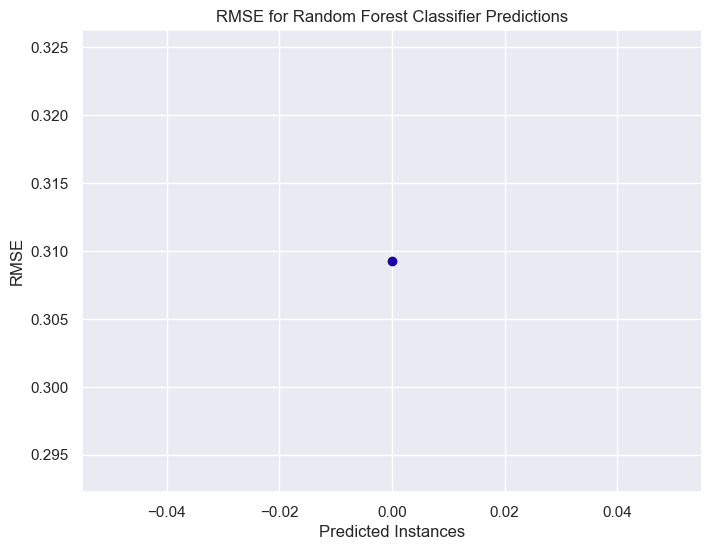

In [155]:
# Get feature importances
feature_importances = random_forest_model.feature_importances_

# Get the feature names
feature_names = X_train.columns  # Assuming you have named columns in your feature matrix

# Create a dictionary to associate feature names with their importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort features by importance in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")
print("-"*50)
# Alternatively, you can use numpy to get feature importances and sort them
importances = random_forest_model.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print(f"{feature_names[indices[f]]}: {importances[indices[f]]}")

DEBTINC_missing_values_flag: 0.17142252571752384
DEBTINC: 0.14567605366888814
CLAGE: 0.08888415393737467
DELINQ: 0.07789946232927561
LOAN: 0.0700989423153661
VALUE: 0.06998197229059112
MORTDUE: 0.06575533770424638
CLNO: 0.063374150552252
YOJ: 0.050236998034367736
DEROG: 0.03911616652178389
NINQ: 0.03716831751526368
VALUE_missing_values_flag: 0.023226071096228398
JOB_Other: 0.00961840496092221
REASON_DebtCon: 0.009192090185735058
JOB_Office: 0.008826968500206086
REASON_HomeImp: 0.008144582855549505
DEROG_missing_values_flag: 0.007561778576562329
JOB_ProfExe: 0.007272660603803248
JOB_Mgr: 0.006472242121350241
REASON_missing_values_flag: 0.006144911213156681
MORTDUE_missing_values_flag: 0.005501893497167814
YOJ_missing_values_flag: 0.005463555848694436
JOB_Sales: 0.005204461269899385
CLAGE_missing_values_flag: 0.004494947994308522
NINQ_missing_values_flag: 0.004151245683526203
DELINQ_missing_values_flag: 0.003827201354772479
JOB_Self: 0.0034117530673765002
CLNO_missing_values_flag: 0.0018

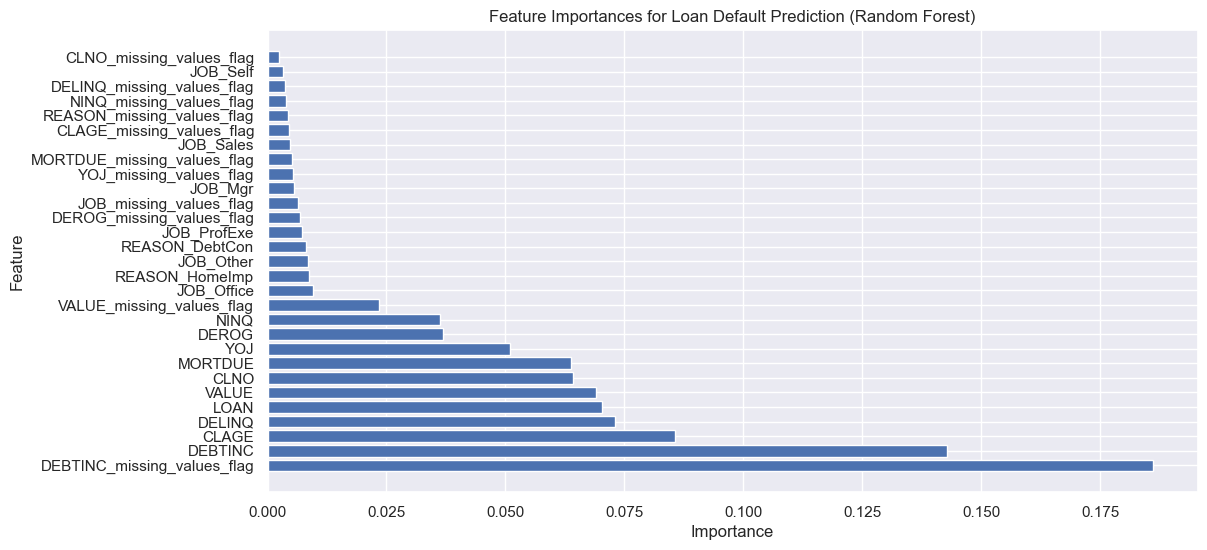

In [49]:
# Get feature importances
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display feature importances
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Loan Default Prediction (Random Forest)')
plt.show()

In [50]:
max_depth = 13  # Adjust the desired max_depth
class_weights =  {0: 1, 1: 5} #{0: 1.0, 1: 5.0}  # Adjust class weights as needed (e.g., favoring class 1)

random_forest_model_tuned_depth_weight = RandomForestClassifier(
    random_state=42,
    max_depth=max_depth,
    class_weight=class_weights
)
random_forest_model_tuned_depth_weight.fit(X_train, y_train)

# Predict loan defaults on the test set
y_pred = random_forest_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Random Forest Model Performance:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Random Forest Model Performance:
Accuracy: 0.91
Precision: 0.83
Recall: 0.69
F1 Score: 0.75


In [51]:
max_depth = 14  # You can adjust this value to increase the depth
random_forest_model_tuned_depth = RandomForestClassifier(random_state=42, max_depth=max_depth)
random_forest_model_tuned_depth.fit(X_train, y_train)

# Evaluate the model's performance
y_pred = random_forest_model.predict(X_test)

# Calculate performance metrics
rf5_accuracy = accuracy_score(y_test, y_pred)
rf5_precision = precision_score(y_test, y_pred)
rf5_recall = recall_score(y_test, y_pred)
rf5_f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Random Forest Model Performance:")
print("Accuracy: {:.2f}".format(rf5_accuracy))
print("Precision: {:.2f}".format(rf5_precision))
print("Recall: {:.2f}".format(rf5_recall))
print("F1 Score: {:.2f}".format(rf5_f1))

Random Forest Model Performance:
Accuracy: 0.91
Precision: 0.83
Recall: 0.69
F1 Score: 0.75


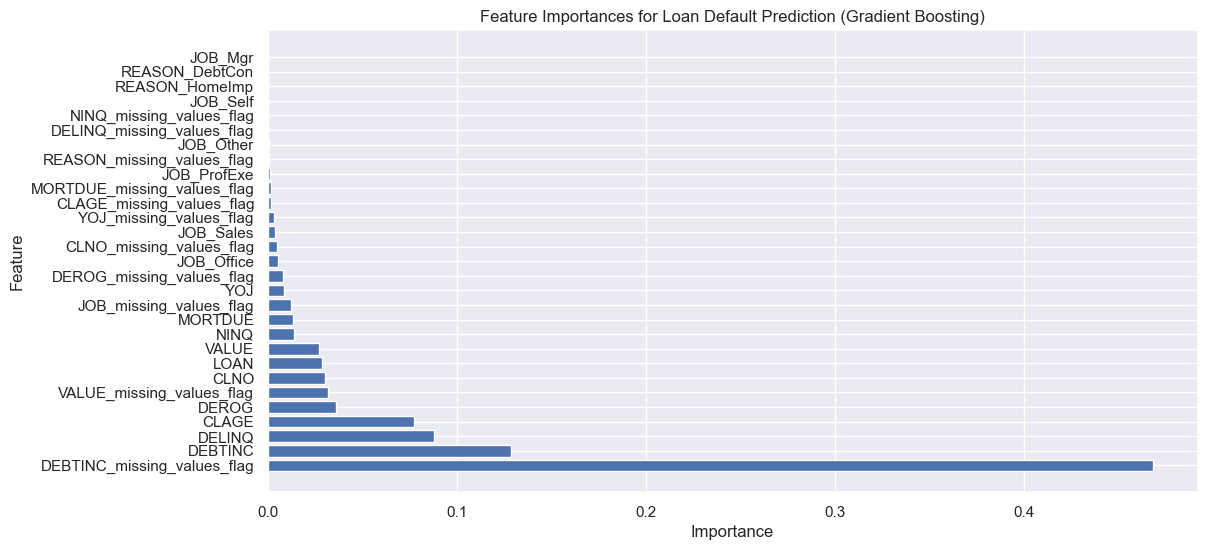

Accuracy: 0.8987695749440716
Gradient Boosting Model Performance with Increased Max Depth:
Accuracy: 0.90
Precision: 0.80
Recall: 0.66
F1 Score: 0.72


In [52]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and train a Gradient Boosting Classifier
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

# Get feature importances
feature_importances = gradient_boosting_model.feature_importances_

# Create a DataFrame to display feature importances
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Loan Default Prediction (Gradient Boosting)')
plt.show()

# Predict loan default on the test set
y_pred = gradient_boosting_model.predict(X_test)

# You can evaluate the model's performance using metrics such as accuracy, precision, recall, and F1 score.
# For example, to calculate accuracy:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Gradient Boosting Model Performance with Increased Max Depth:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

In [1]:
from sklearn.svm import SVC

# Create and train an SVM Classifier
svm_model = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predict loan defaults on the test set
y_pred = svm_model.predict(X_test)

# Calculate performance metrics (e.g., accuracy, precision, recall, and F1 score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("SVM Model Performance:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

# Visualize support vectors (if necessary)
# To understand which variables are important, you can analyze the support vectors.

# Get the support vectors
#support_vectors = svm_model.support_vectors_

# You can analyze these support vectors to understand their impact on the decision function.
# Visualize if needed.

NameError: name 'X_train' is not defined

### **Think about it:**
- The above Logistic regression model was build on the threshold of 0.5, can we use different threshold?
- How to get an optimal threshold and which curve will help you achieve?
- How does, accuracy, precision and recall change on the threshold?

### **Build a Decision Tree Model**

### **Think about it:**
- In Logistic regression we treated the outliers and built the model, should we do the same for tree based models or not? If not, why?

#### Data Preparation for the tree based model

In [334]:
#@title
# Add binary flags
# List of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)
    

In [ ]:
#@title
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
# Remove _________ and complete the code
data[num_data.columns] = num_data._________________

# Fill object columns with model.
# Remove _________ and complete the code
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].____________

#### Separating the target variable y and independent variable x

In [ ]:
#@title
# Drop dependent variable from dataframe and create the X(independent variable) matrix
# Remove _________ and complete the code

X = ____________________

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
# Remove _________ and complete the code
X = ______________________

# Create y(dependent varibale)
# Remove _________ and complete the code

y = ___________________________-

#### Split the data

In [ ]:
#@title
# Split the data into training and test set
# Remove _________ and complete the code


______________ 

In [ ]:
#@title
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
# Remove ___________ and complete the code

_______________

In [ ]:
#@title
#fitting Decision tree model
# Remove ___________ and complete the code
_______________

#### Checking the performance on the train dataset

In [ ]:
#@title
# Checking performance on the training data
# Remove ___________ and complete the code

_______________

#### Checking the performance on the test dataset

In [ ]:
#@title
# Checking performance on the testing data
# Remove _________ and complete the code

_______________

**Insights _____________**

### **Think about it:**
- Can we improve this model? 
- How to get optimal parameters in order to get the best possible results?

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model

In [ ]:
#@title
# Choose the type of classifier. 
# Remove _________ and complete the code
________________


# Grid of parameters to choose from
# Remove _________ and complete the code
________________


# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
_________________


# Run the grid search
# Remove _________ and complete the code
_________________


# Fit the GridSearch on train dataset
# Remove _________ and complete the code
__________________


# Set the clf to the best combination of parameters
# Remove _________ and complete the code
_________________


# Fit the best algorithm to the data. 
# Remove _________ and complete the code
_________________

#### Checking the performance on the train dataset

In [ ]:
#@title
# Checking performance on the training data based on the tuned model
# Remove _________ and complete the code

______________

#### Checking the performance on the test dataset

In [ ]:
#@title
# Checking performance on the testing data based on the tuned model
# Remove _________ and complete the code

_________________


**Insights ___________**

#### Plotting the Decision Tree

In [ ]:
#@title
# Plot the decision  tree and analyze it to build the decision rule
# Remove _________ and complete the code


____________

#### Deduce the business rules apparent from the Decision Tree and write them down: _____

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [ ]:
#@title
# Defining Random forest CLassifier
# Remove _________ and complete the code

___________________

#### Checking the performance on the train dataset

In [ ]:
#@title
#Checking performance on the training data
# Remove _________ and complete the code
_______________

#### Checking the performance on the test dataset

In [ ]:
#@title
# Checking performance on the test data
# Remove _________ and complete the code

_______________

**Observations: __________**

### **Build a Random Forest model with Class Weights**

In [ ]:
#@title
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}

# Remove _________ and complete the code

_____________________________

# Fitting Random Forest model
# Remove _________ and complete the code

_______________

#### Checking the performance on the train dataset

In [ ]:
#@title
# Checking performance on the train data
# Remove _________ and complete the code

________________

#### Checking the performance on the test dataset

In [ ]:
#@title
# Checking performance on the test data
# Remove _________ and complete the code

________________

### **Think about it:**
- Can we try different weights?
- If yes, should we increase or decrease class weights for different classes? 

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### **Warning:** This may take a long time depending on the parameters you tune. 

In [ ]:
#@title
# Choose the type of classifier. 
# Remove _________ and complete the code
________________


# Grid of parameters to choose from
# Remove _________ and complete the code
________________


# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
_________________


# Run the grid search
# Remove _________ and complete the code
_________________


#fit the GridSearch on train dataset
# Remove _________ and complete the code
__________________


# Set the clf to the best combination of parameters
# Remove _________ and complete the code
_________________


# Fit the best algorithm to the data. 
# Remove _________ and complete the code
_________________

#### Checking the performance on the train dataset

In [ ]:
#@title
# Checking performance on the training data
# Remove _________ and complete the code
______________

#### Checking the performance on the test dataset

In [ ]:
#@title
# Checking performace on test dataset
# Remove _________ and complete the code

_________________

**Insights: _____**

#### Plot the Feature importance of the tuned Random Forest

In [ ]:
#@title
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
# Remove _________ and complete the code

_________________

### **Think about it:**
- We have only built 3 models so far, Logistic Regression, Decision Tree and Random Forest 
- We can build other Machine Learning classification models like kNN, LDA, QDA or even Support Vector Machines (SVM).
- Can we also perform feature engineering and create model features and build a more robust and accurate model for this problem statement? 

### **Comparing Model Performances**

In [53]:
#@title
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [54]:
#@title
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [55]:
#@title
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [56]:
#@title
# Make the list of all the model names 

models = [logistic_model,decision_tree_model,decision_tree_model_tuned,random_forest_model,random_forest_model_tuned_depth,random_forest_model_tuned_depth_weight,gradient_boosting_model]
# Remove _________ and complete the code

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [57]:
#@title
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]
# Remove _________ and complete the code

comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Decision Tree Tuned','Random Forest','Random Forest Tuned Depth','Random Forest Tuned Depth Weight','Gradient Boosting'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression,0.805369,0.807606,0.037260,0.050420,0.738095,0.782609
1,Decision Tree,1.000000,0.868568,1.000000,0.624650,1.000000,0.688272
2,Decision Tree Tuned,0.898849,0.885906,0.721154,0.675070,0.759494,0.732523
3,Random Forest,1.000000,0.909955,1.000000,0.694678,1.000000,0.826667
4,Random Forest Tuned Depth,0.973394,0.904922,0.872596,0.689076,0.993160,0.806557
5,Random Forest Tuned Depth Weight,0.972196,0.894855,0.955529,0.691877,0.909611,0.760000
6,Gradient Boosting,0.925216,0.898770,0.735577,0.663866,0.869318,0.795302


**Insights: ________**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?